# Video Games Sales Prediction

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
from matplotlib import pyplot

c:\Users\ThinkPad\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ThinkPad\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Get the Data


We will start by importing the data: 


In [2]:
data_Frame = pd.read_csv("C:\\Users\\ThinkPad\\Desktop\\Video_Games_Sales_as_at_22_Dec_2016.csv")
data_Frame


Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0              76.0          51.0          8       322.0  Nintendo      E  
1               NaN           NaN        NaN         NaN       NaN    NaN  
2              82.0          73.0        8.3       709.0  Nintendo      E  
3              80.0          73.0          8       192.0  Nintendo      E  
4               NaN           NaN        NaN         NaN       NaN    NaN  
...             ...           ...        ...         ...       ...    ...  
16714           NaN           NaN        NaN         NaN       NaN    NaN  
16715           NaN           NaN        NaN         NaN       NaN    NaN  
16716           NaN           NaN        NaN         NaN       NaN    NaN  
16717           NaN           NaN        NaN         NaN       NaN    NaN  
16718           NaN           NaN        NaN         NaN       NaN    NaN  

[16719 rows x 16 columns]

In [80]:
data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Data analysis and visualization

Lets explore the Genre data

In [81]:
data_Frame['Genre'].describe()

count      16717
unique        12
top       Action
freq        3370
Name: Genre, dtype: object

We have 12 unique Genre in the dataset

In [82]:
data_Frame['Genre'].value_counts()

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

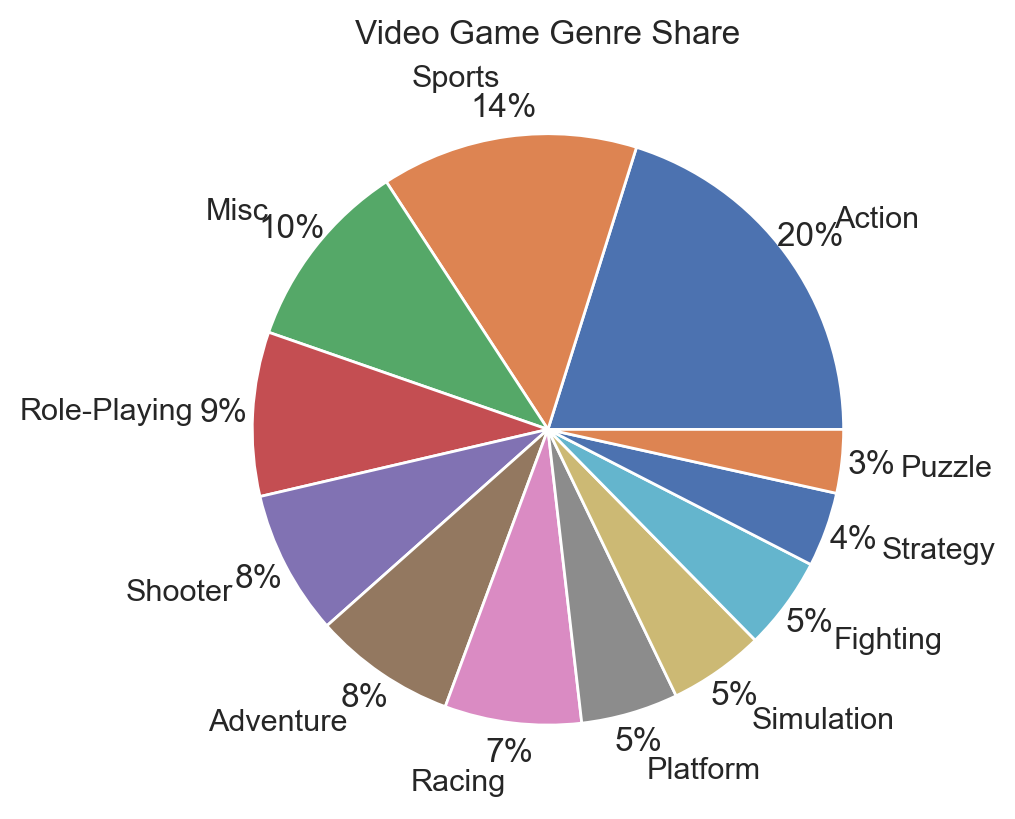

In [83]:
pyplot.pie(data_Frame.Genre.value_counts(), labels=data_Frame.Genre.value_counts().index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
pyplot.title('Video Game Genre Share')
pyplot.ylabel(' ')
pyplot.show()

We can see that Action and Sport are the most common Genre in the dataset


Lets explore the Platforms data

In [84]:
data_Frame['Platform'].describe()

count     16719
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object

We have 31 unique values for the Platform

In [85]:
data_Frame['Platform'].value_counts()

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

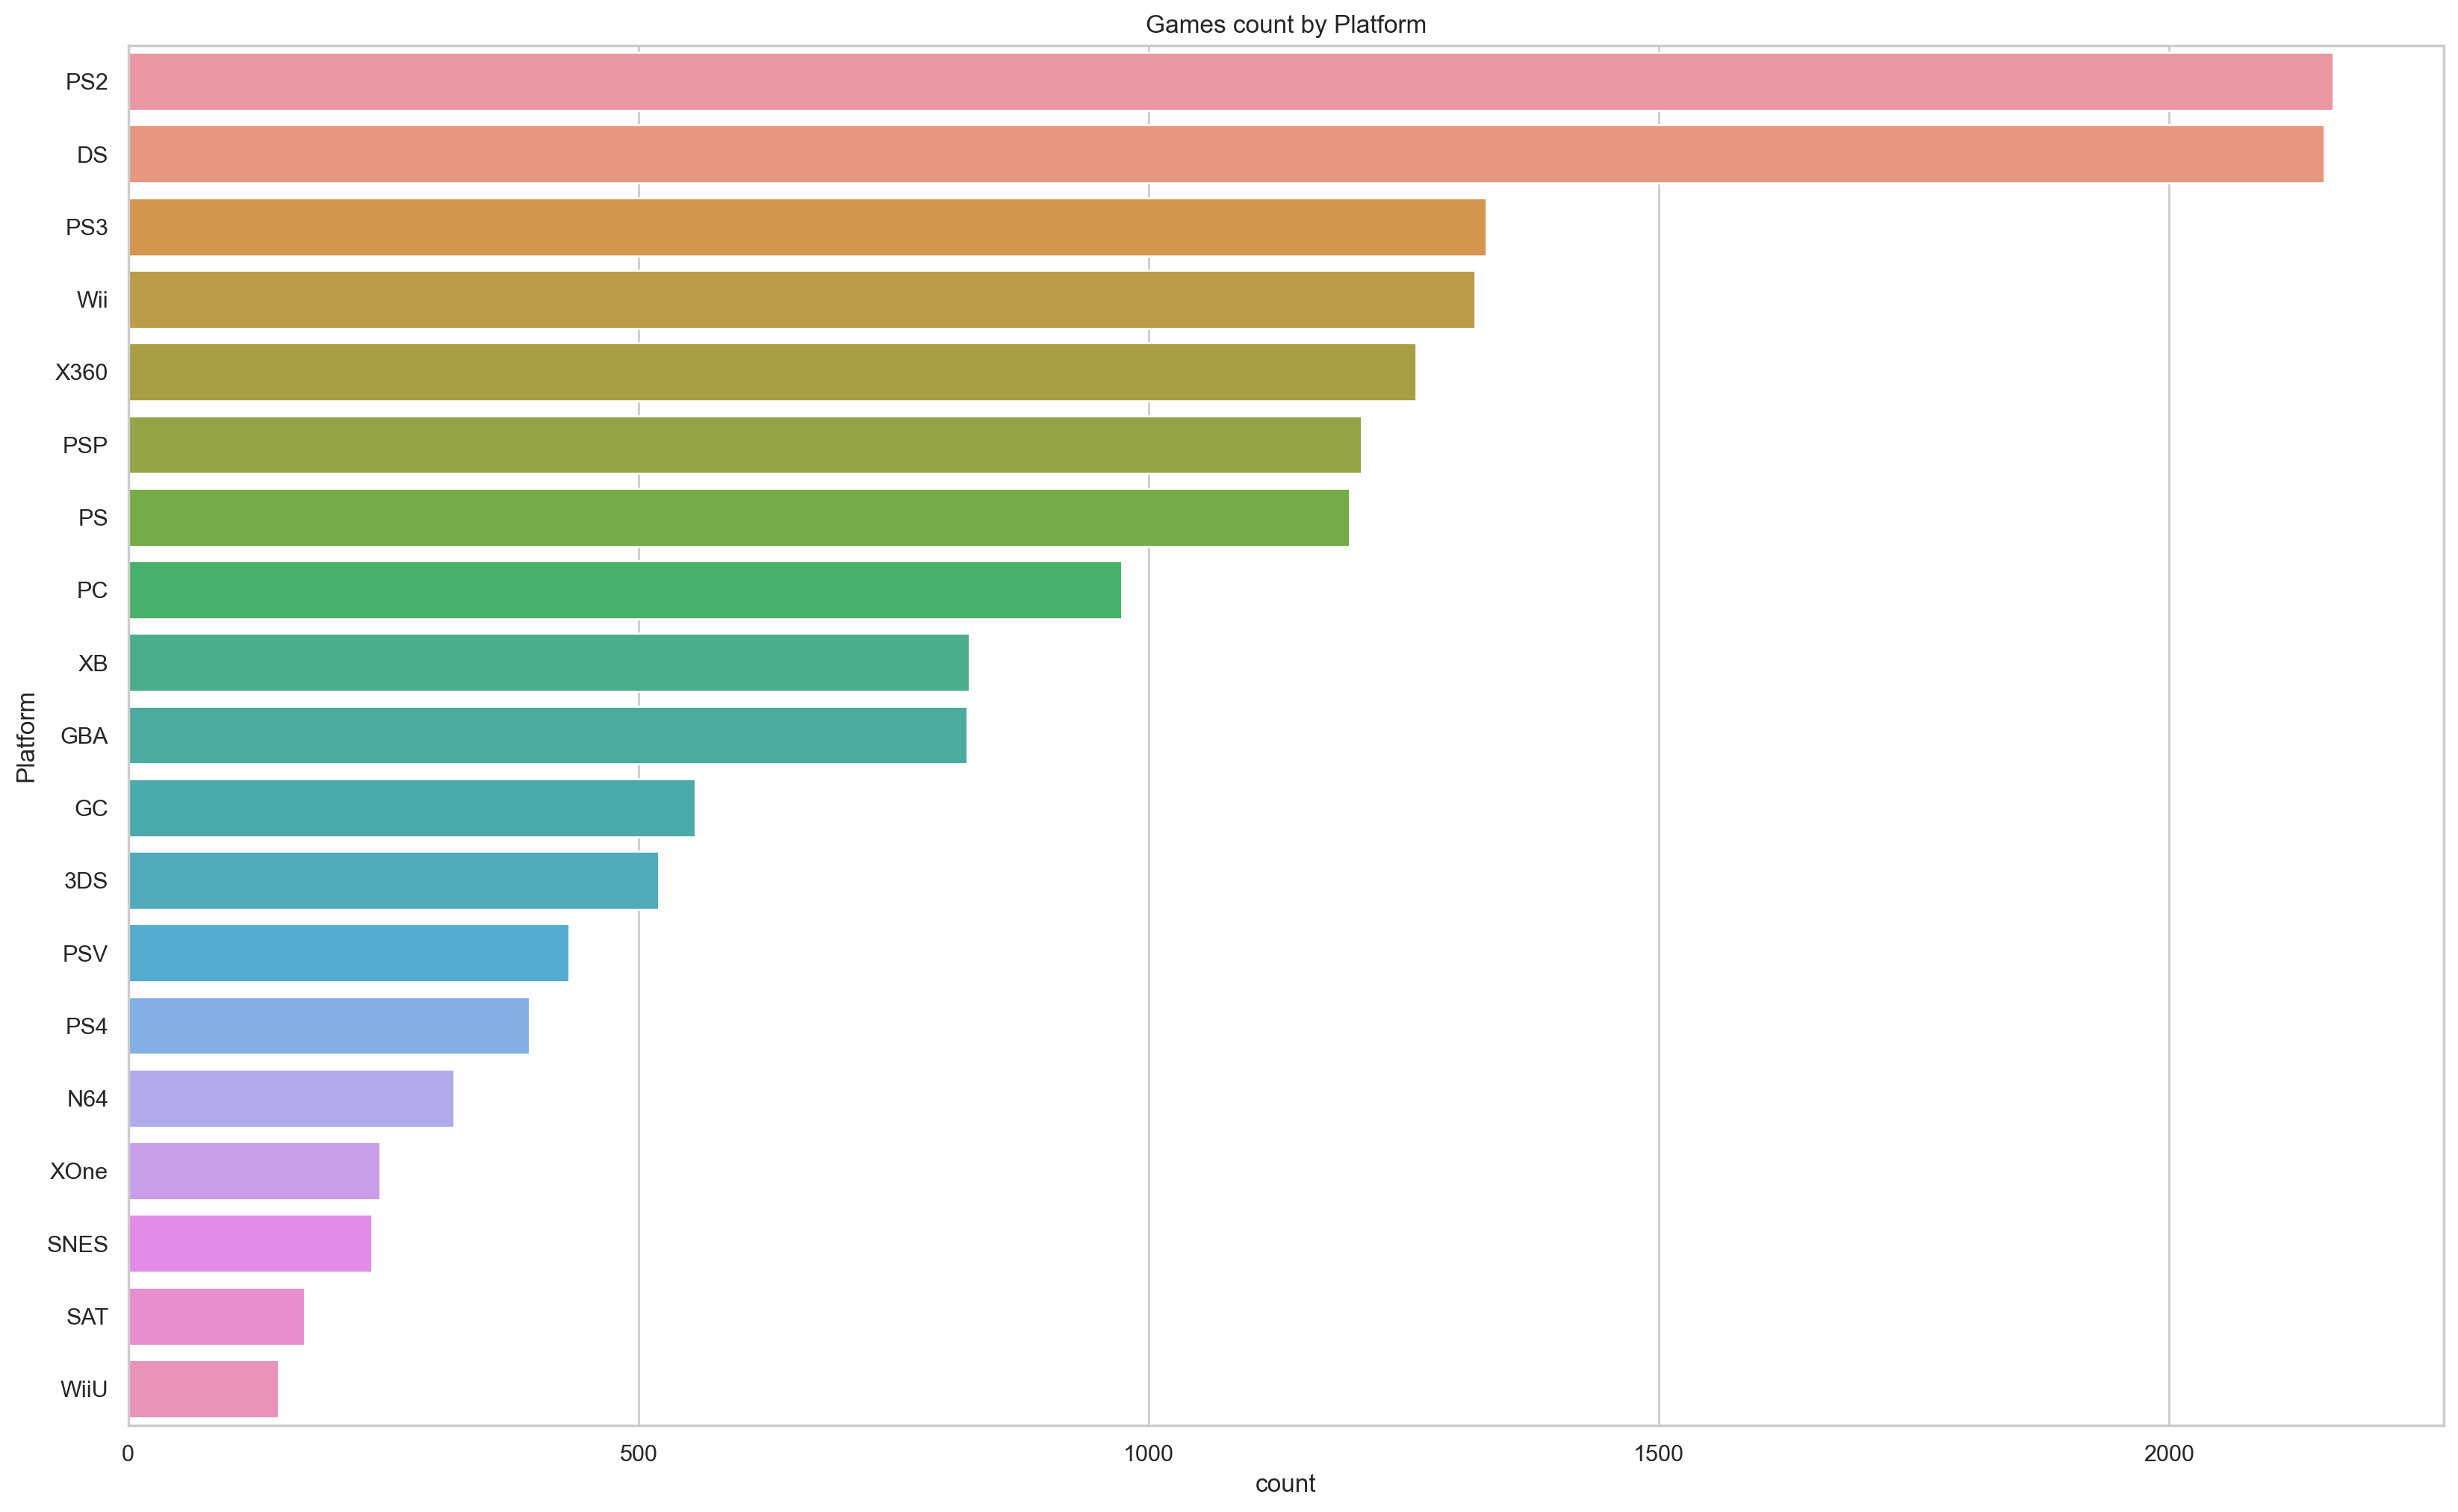

In [86]:
pyplot.figure(figsize = (20,12))
pyplot.title('Games count by Platform')
sns.countplot(y='Platform', data=data_Frame, order=data_Frame.Platform.value_counts().iloc[:19].index)
pyplot.show()

We can see that PS2 and DS are the most common platforms in the dataset 


Lets explore the Publisher data

In [87]:
data_Frame['Publisher'].describe()

count               16665
unique                581
top       Electronic Arts
freq                 1356
Name: Publisher, dtype: object

In [88]:
data_Frame['Publisher'].value_counts()

Publisher
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: count, Length: 581, dtype: int64

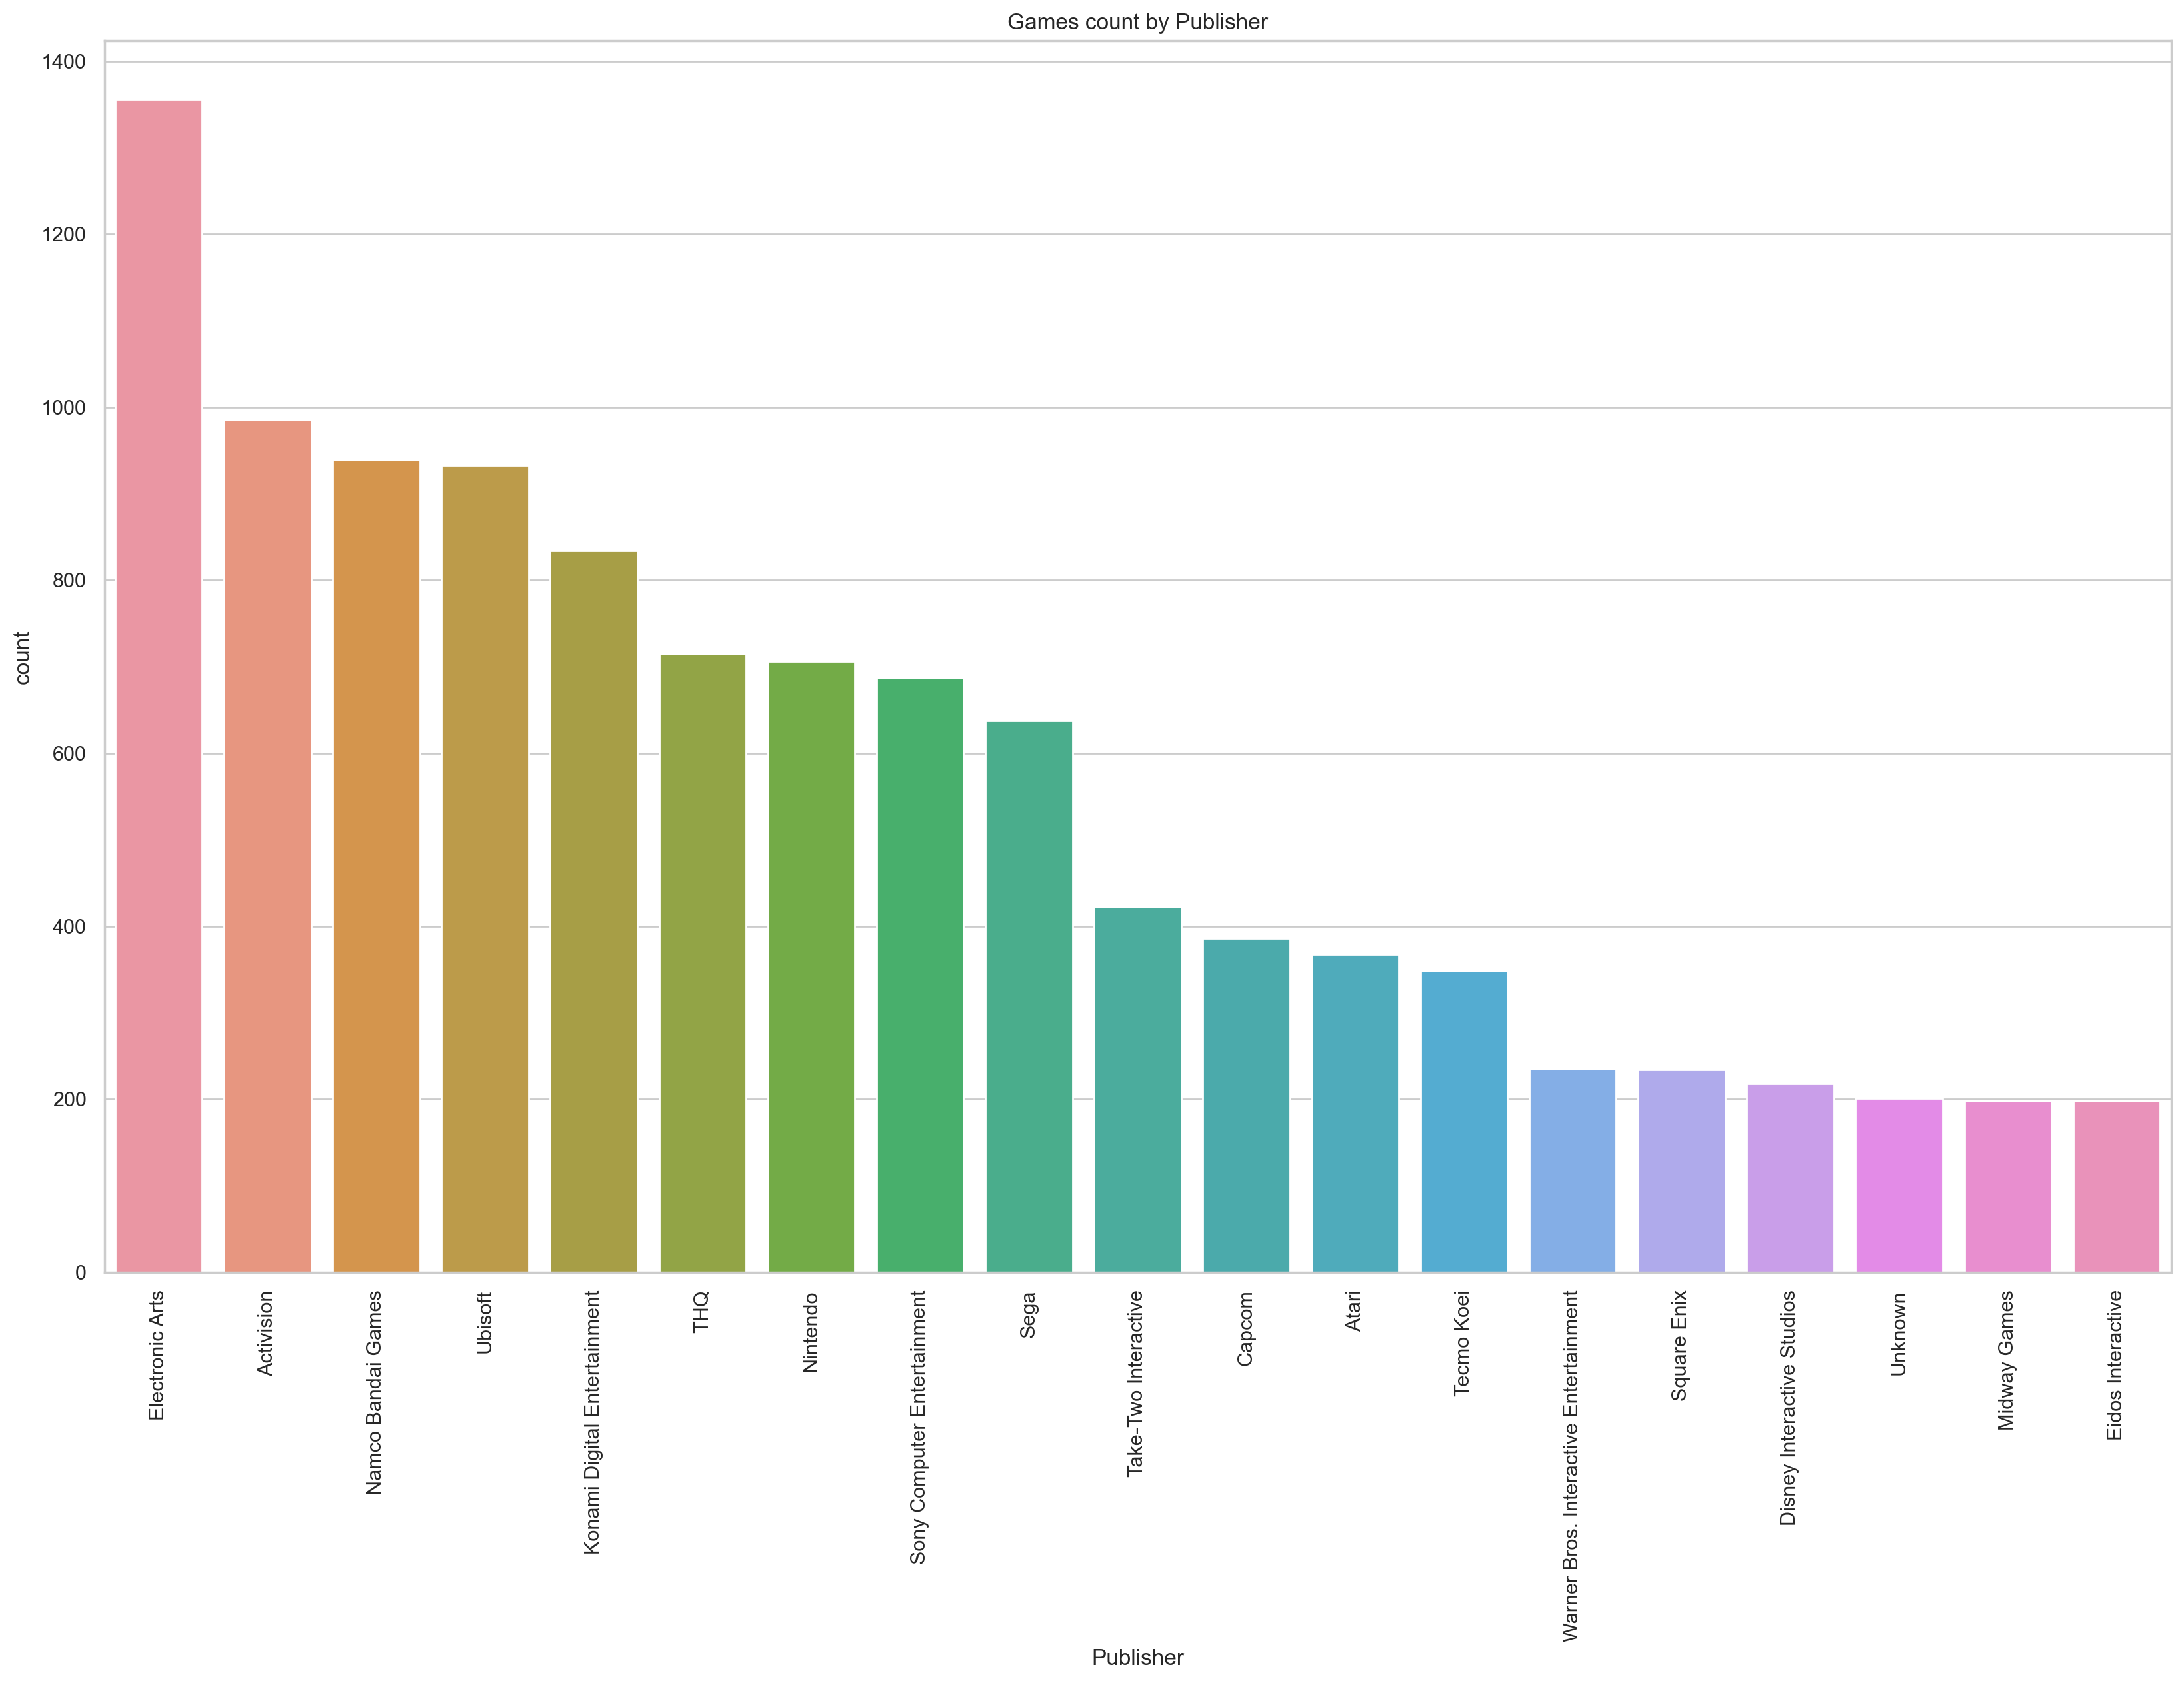

In [89]:
pyplot.figure(figsize = (20,12))
pyplot.title('Games count by Publisher')
sns.countplot(x='Publisher', data=data_Frame, order=data_Frame.Publisher.value_counts().iloc[:19].index)
pyplot.xticks(rotation= 90)
pyplot.show()

We have 581 unique Publisher categories in the dataset, and Electronic Arts is the most common publisher, The figure above shows the top 20 publishers in the dataset

Lets explore the Critic_Score

In [90]:
data_Frame['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [91]:
data_Frame['Critic_Score'].value_counts()

Critic_Score
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: count, Length: 82, dtype: int64

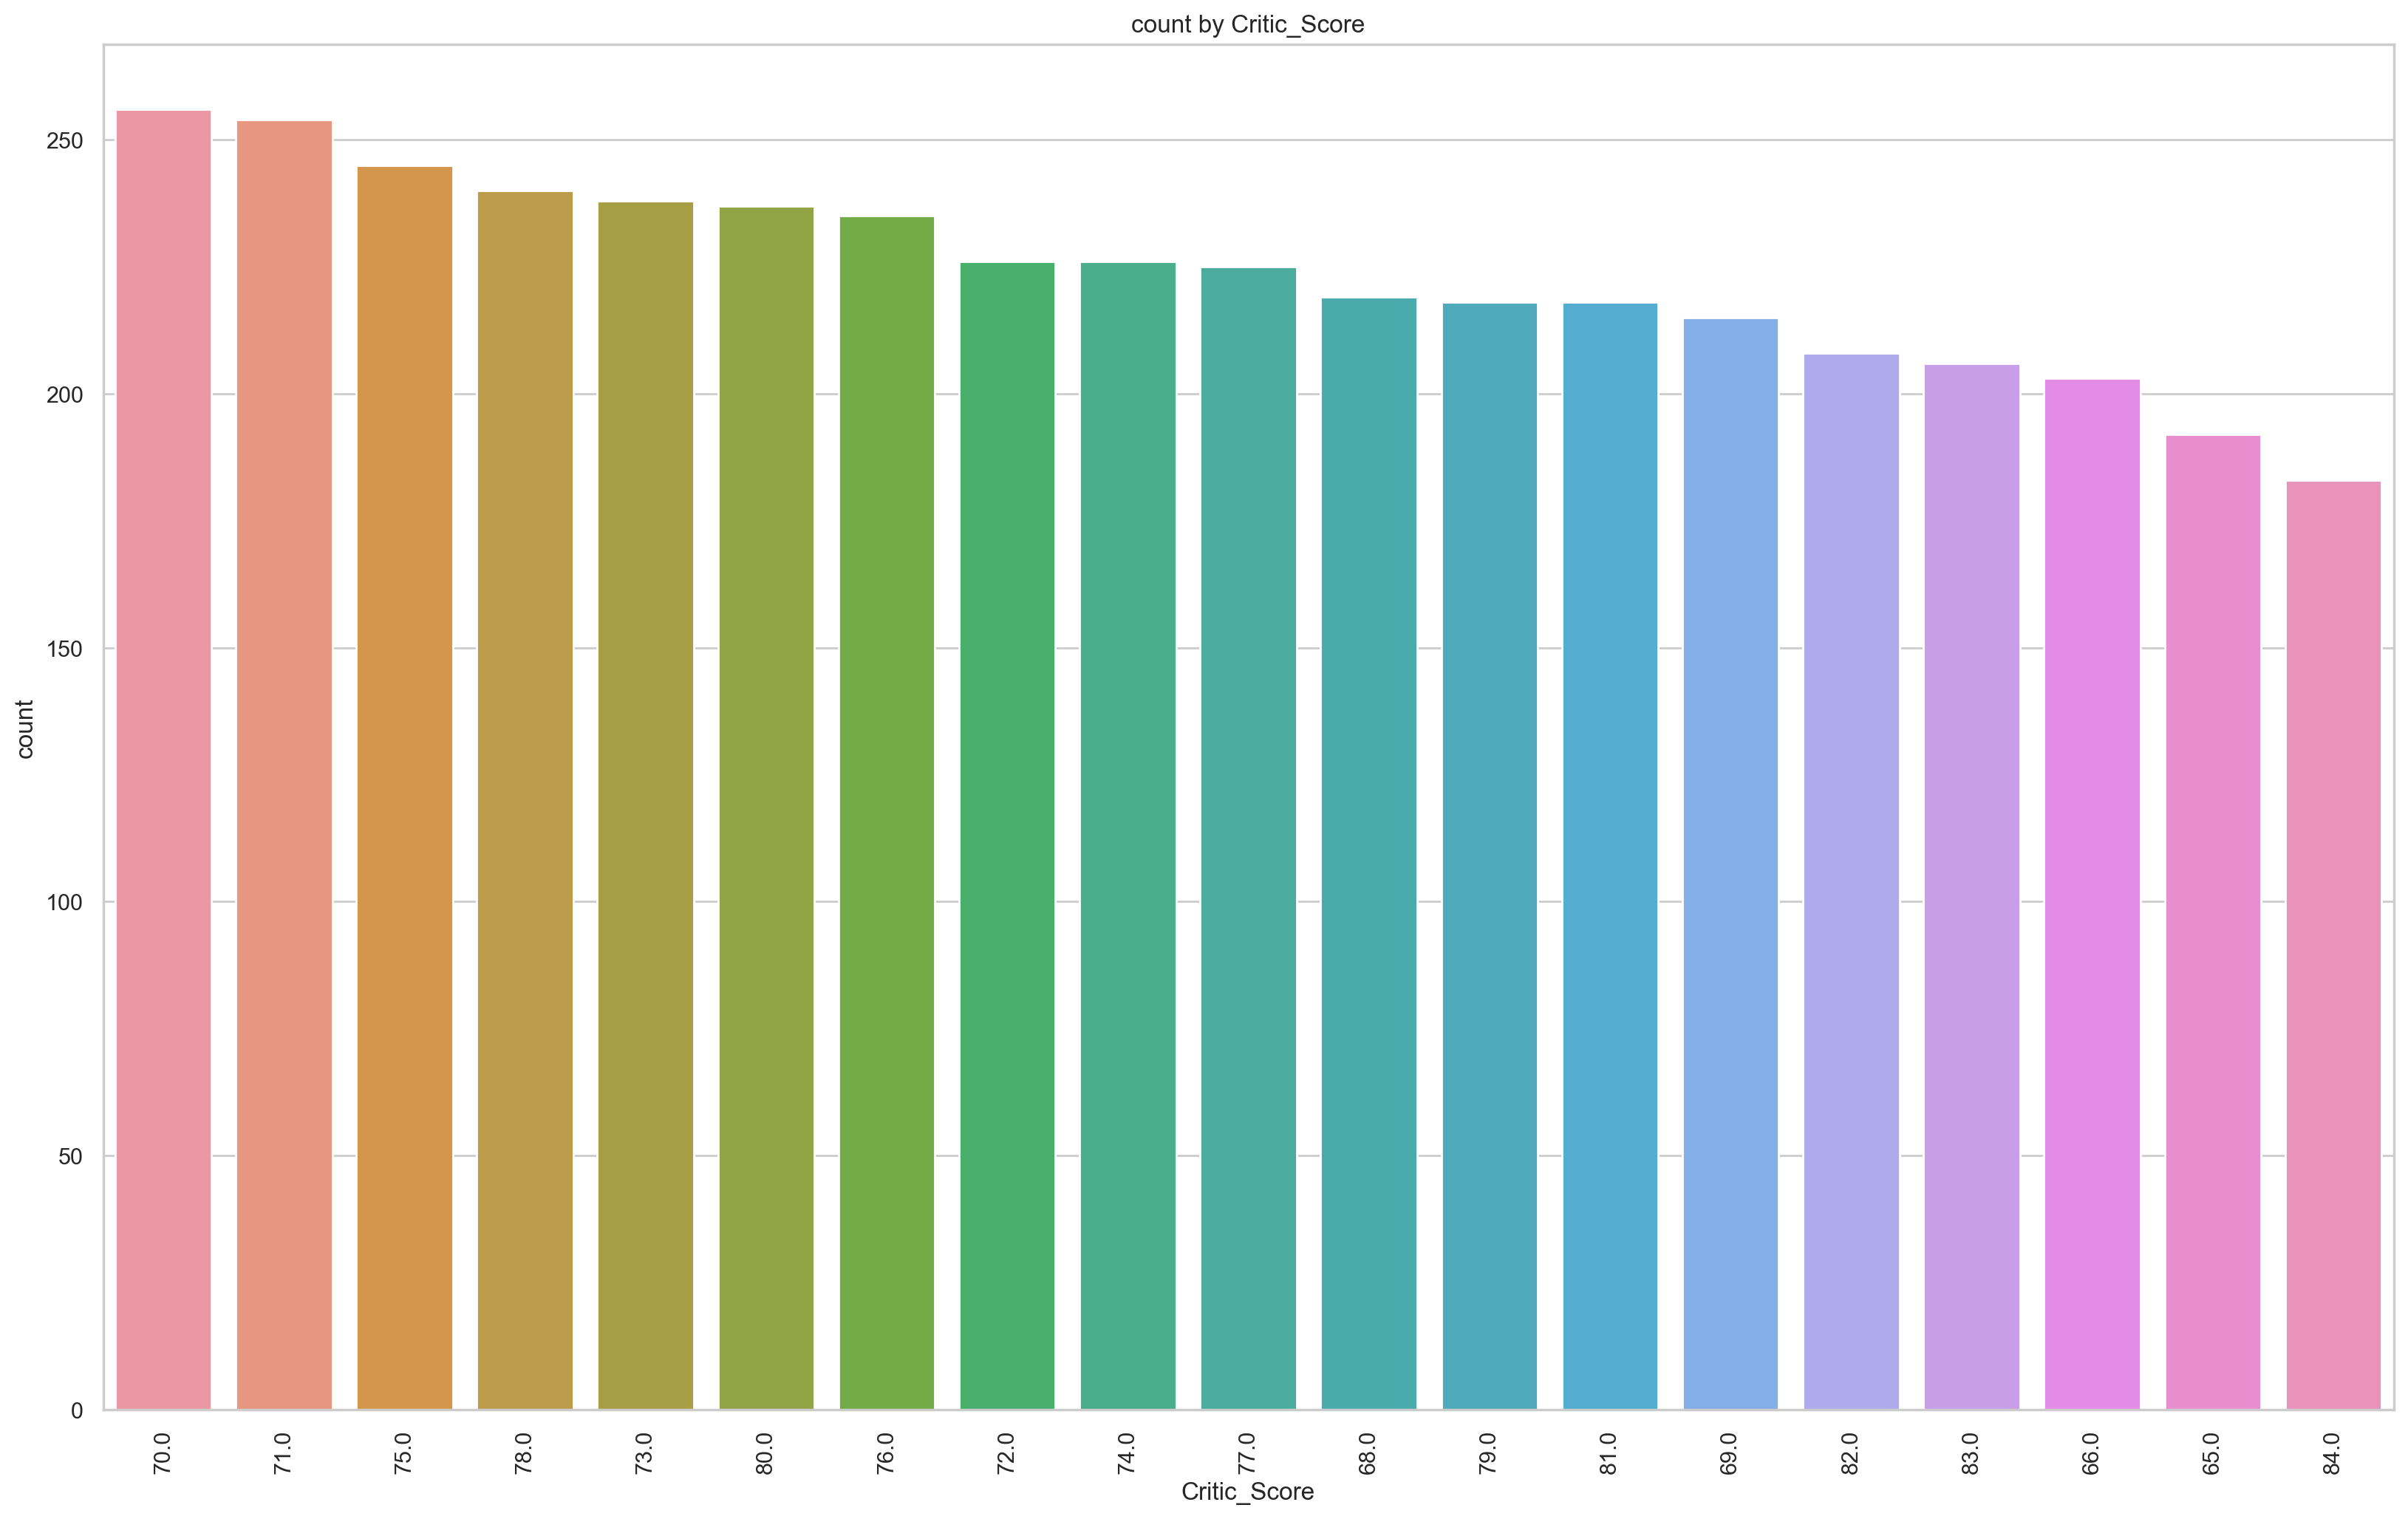

In [92]:
pyplot.figure(figsize = (20,12))
pyplot.title('count by Critic_Score')
sns.countplot(x='Critic_Score', data=data_Frame, order=data_Frame.Critic_Score.value_counts().iloc[:19].index)
pyplot.xticks(rotation= 90)
pyplot.show()

As we see in the graph, the ratings 70 and 71 received the same number of counts and are the highest value

Lets explore the Rating 

In [93]:
data_Frame['Rating'].describe()

count     9950
unique       8
top          E
freq      3991
Name: Rating, dtype: object

In [94]:
data_Frame['Rating'].value_counts()

Rating
E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

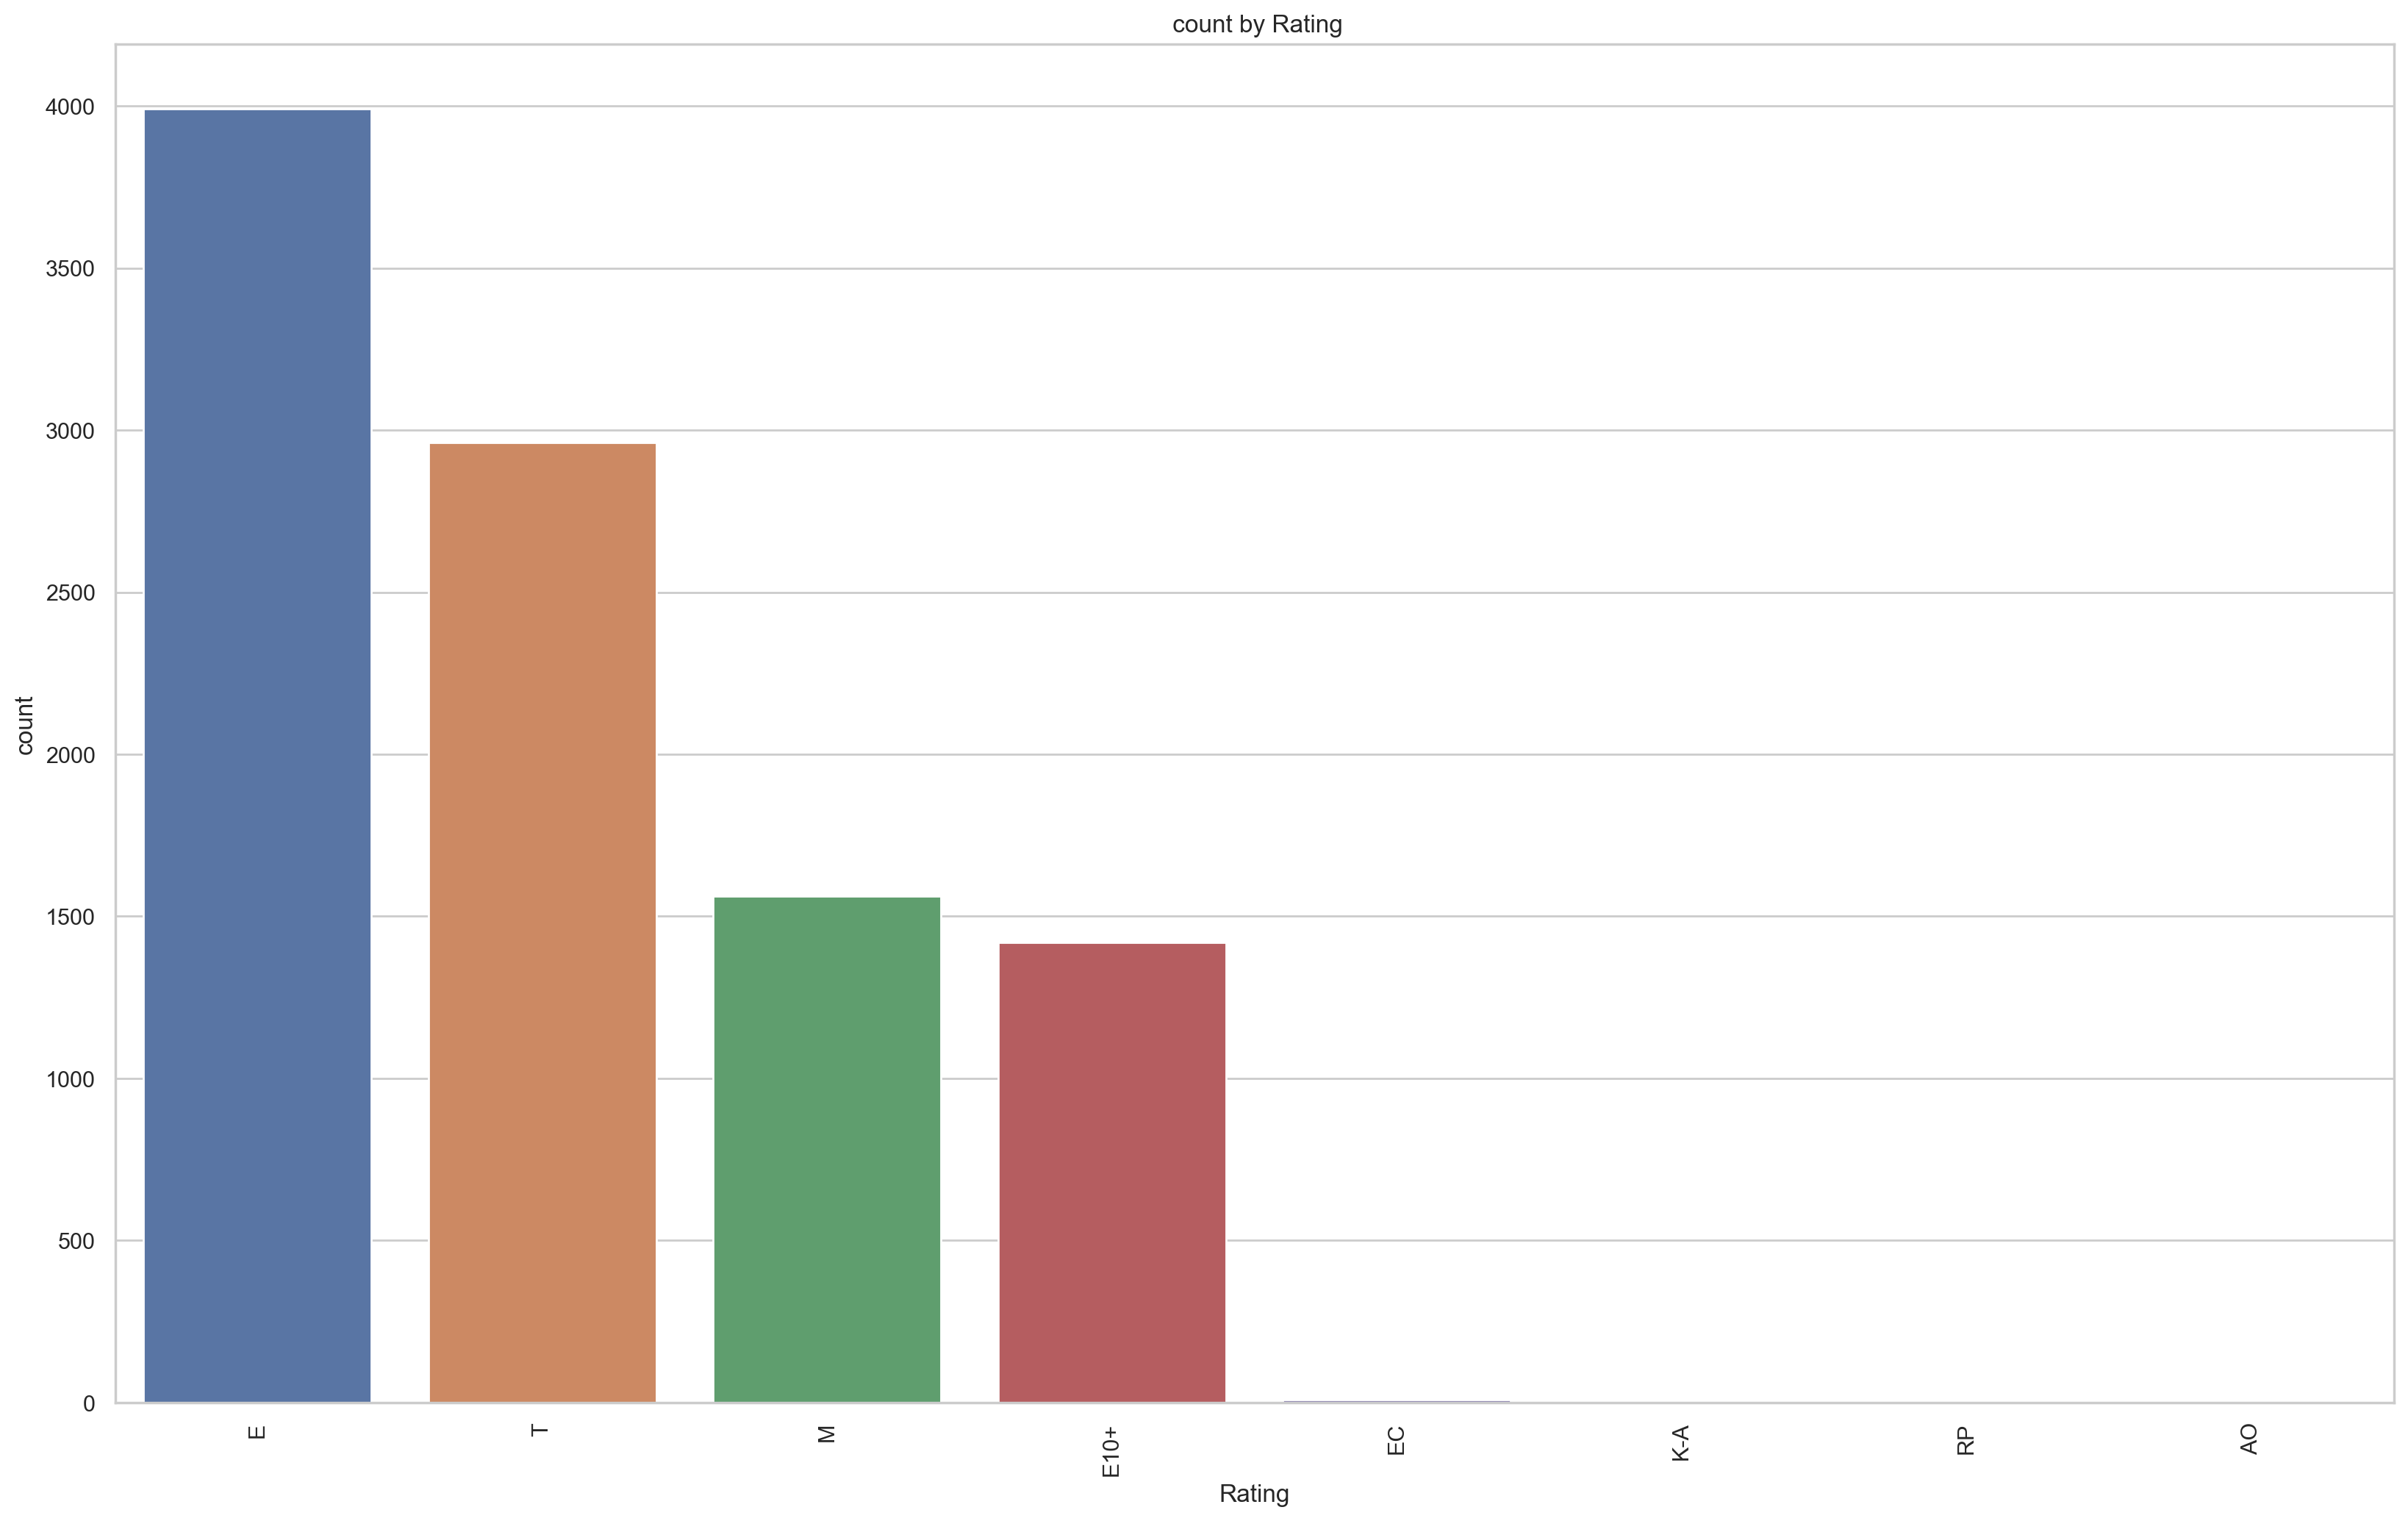

In [95]:
pyplot.figure(figsize = (20,12))
pyplot.title(' count by Rating')
sns.countplot(x='Rating', data=data_Frame, order=data_Frame.Rating.value_counts().iloc[:19].index)
pyplot.xticks(rotation= 90)
pyplot.show()

As we see in the graph, the values ​​E and T received the highest value.

E ------(13-15 Years)

T ------(15-18 Years)

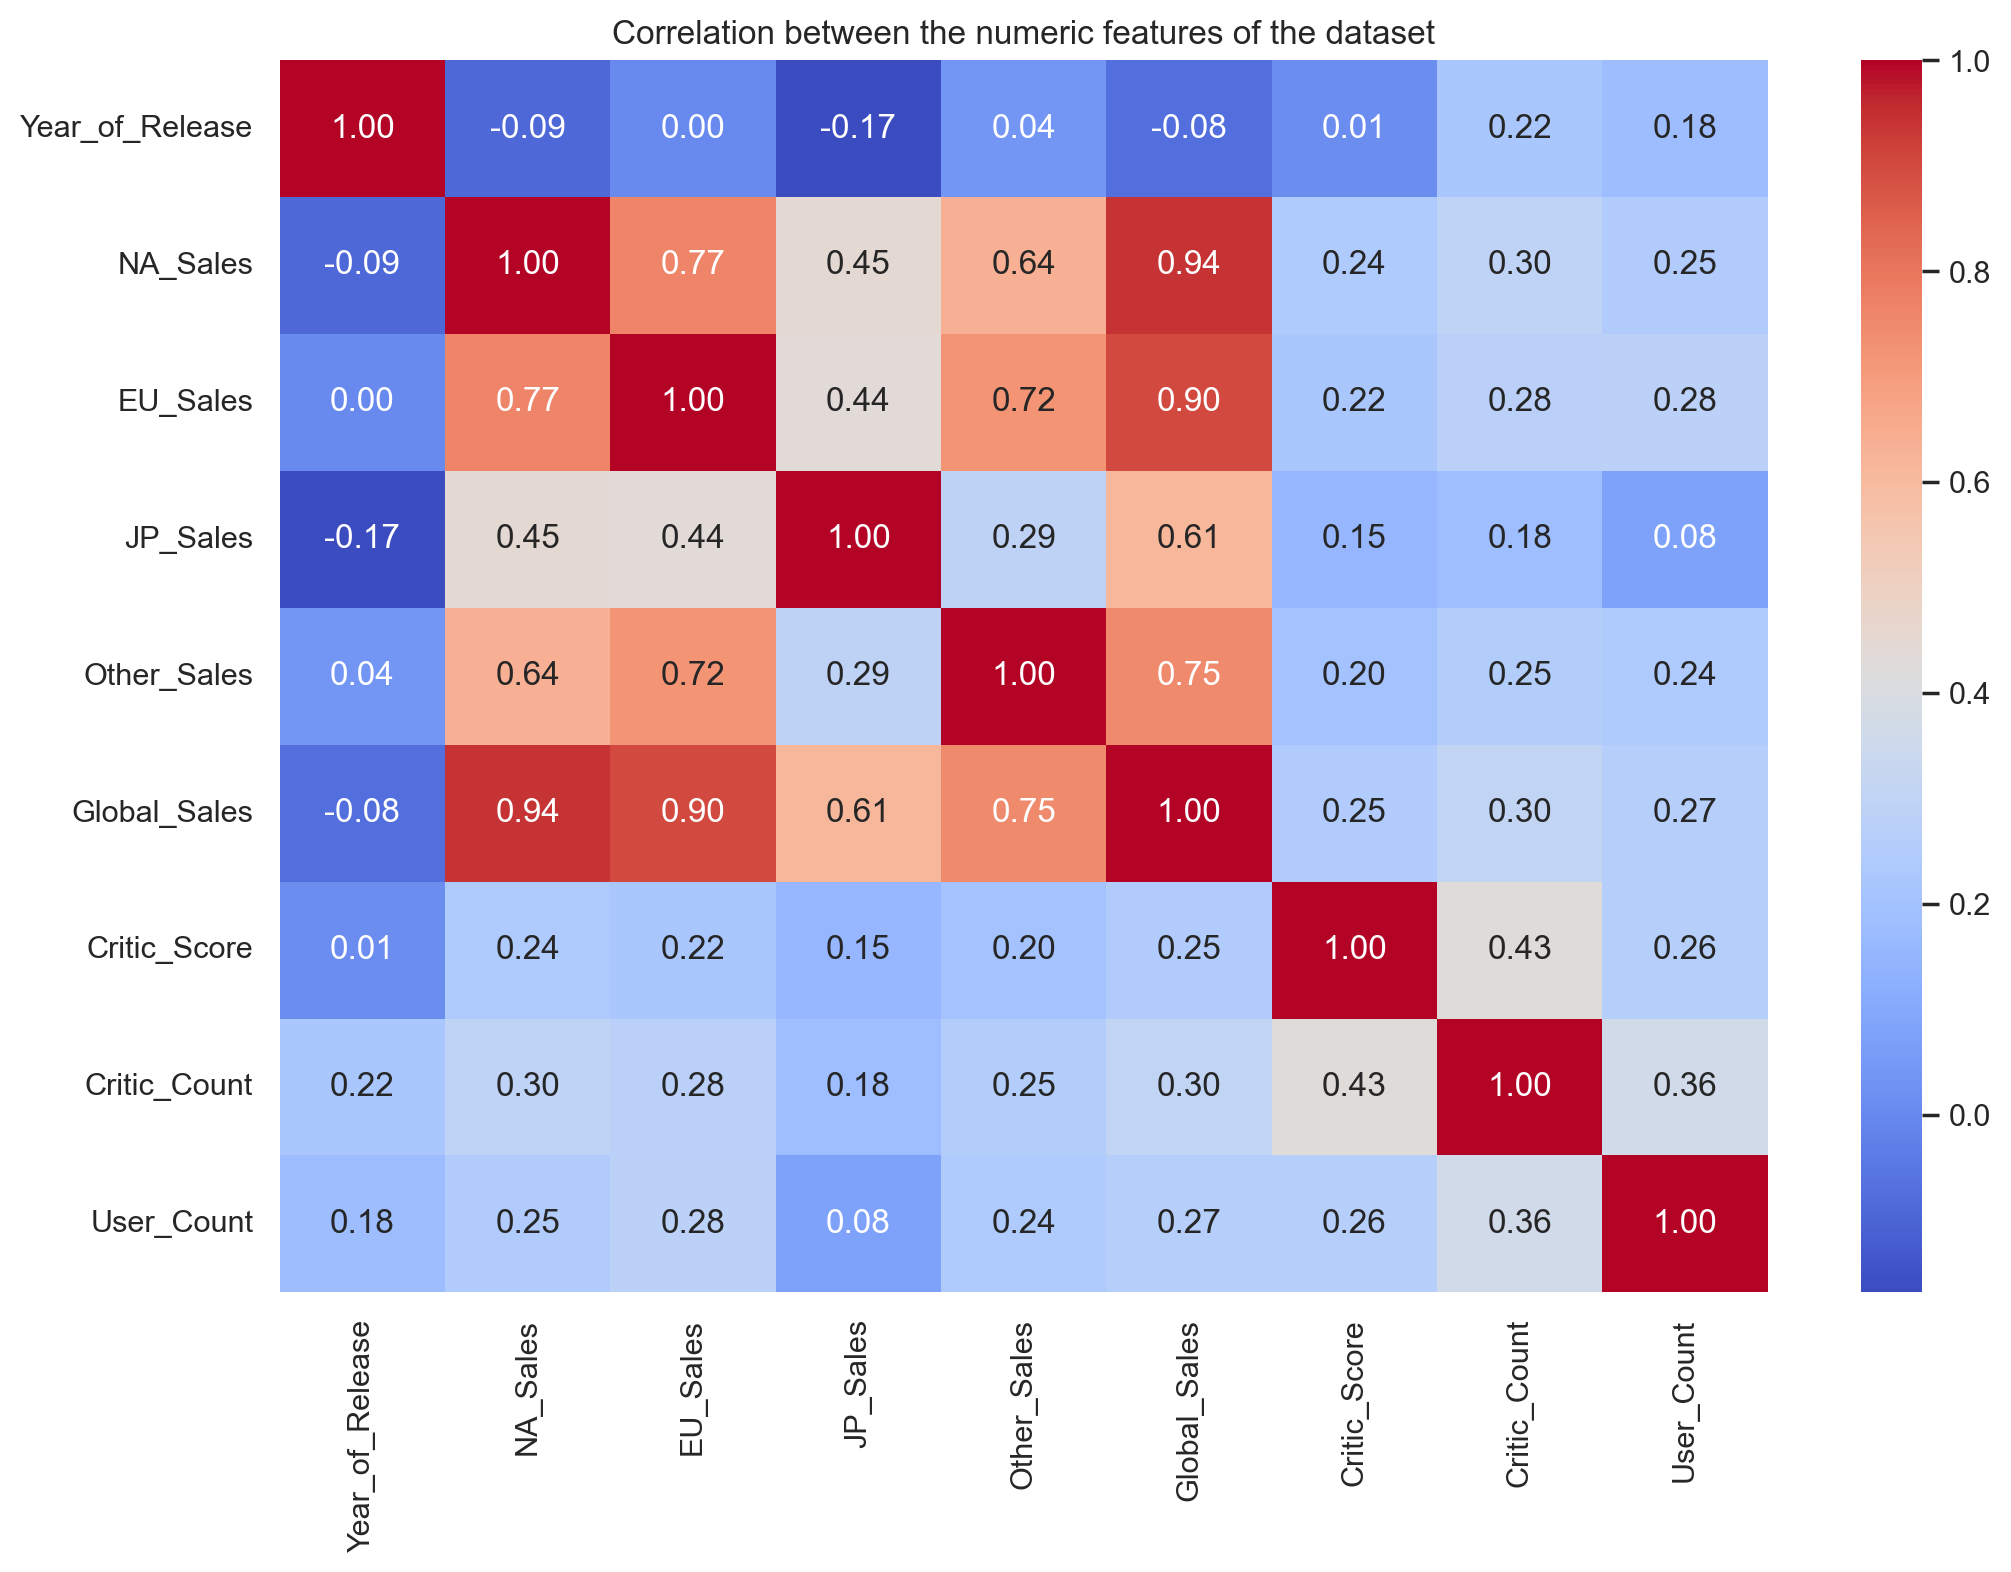

In [96]:
numeric_data = data_Frame.select_dtypes(include=['number'])


pyplot.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
pyplot.title('Correlation between the numeric features of the dataset')
pyplot.show()

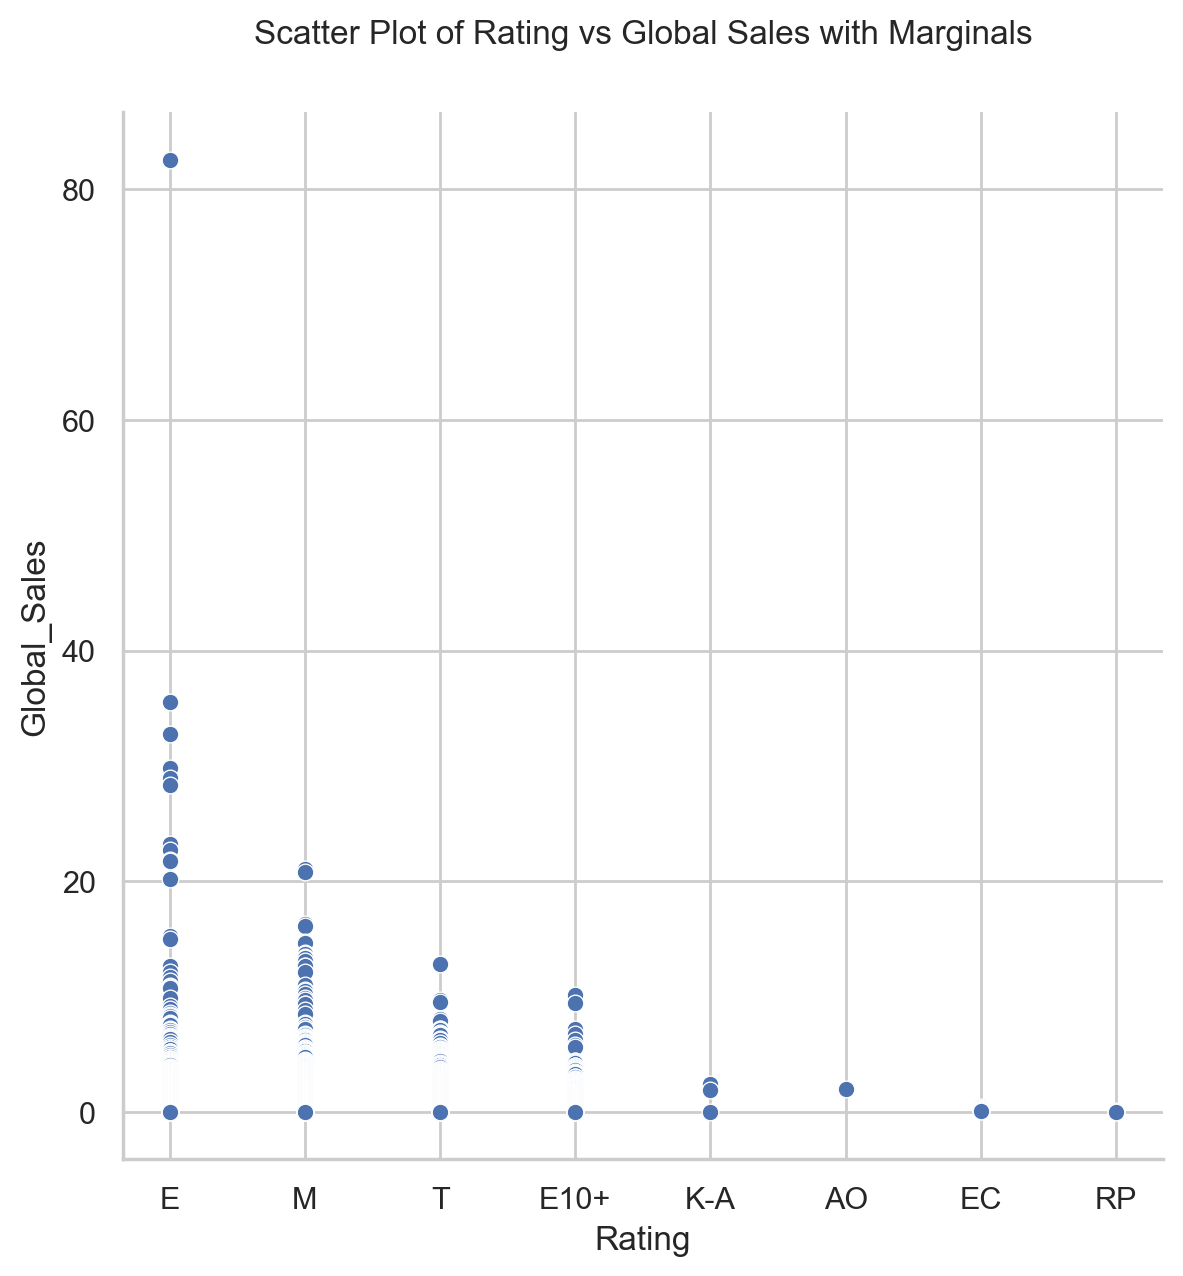

In [97]:

sns.set(style="whitegrid")
sns.pairplot(data_Frame, x_vars=["Rating"], y_vars=["Global_Sales"], kind="scatter", height=6, diag_kind="kde")

pyplot.title("Scatter Plot of Rating vs Global Sales with Marginals", y=1.05)
pyplot.show()


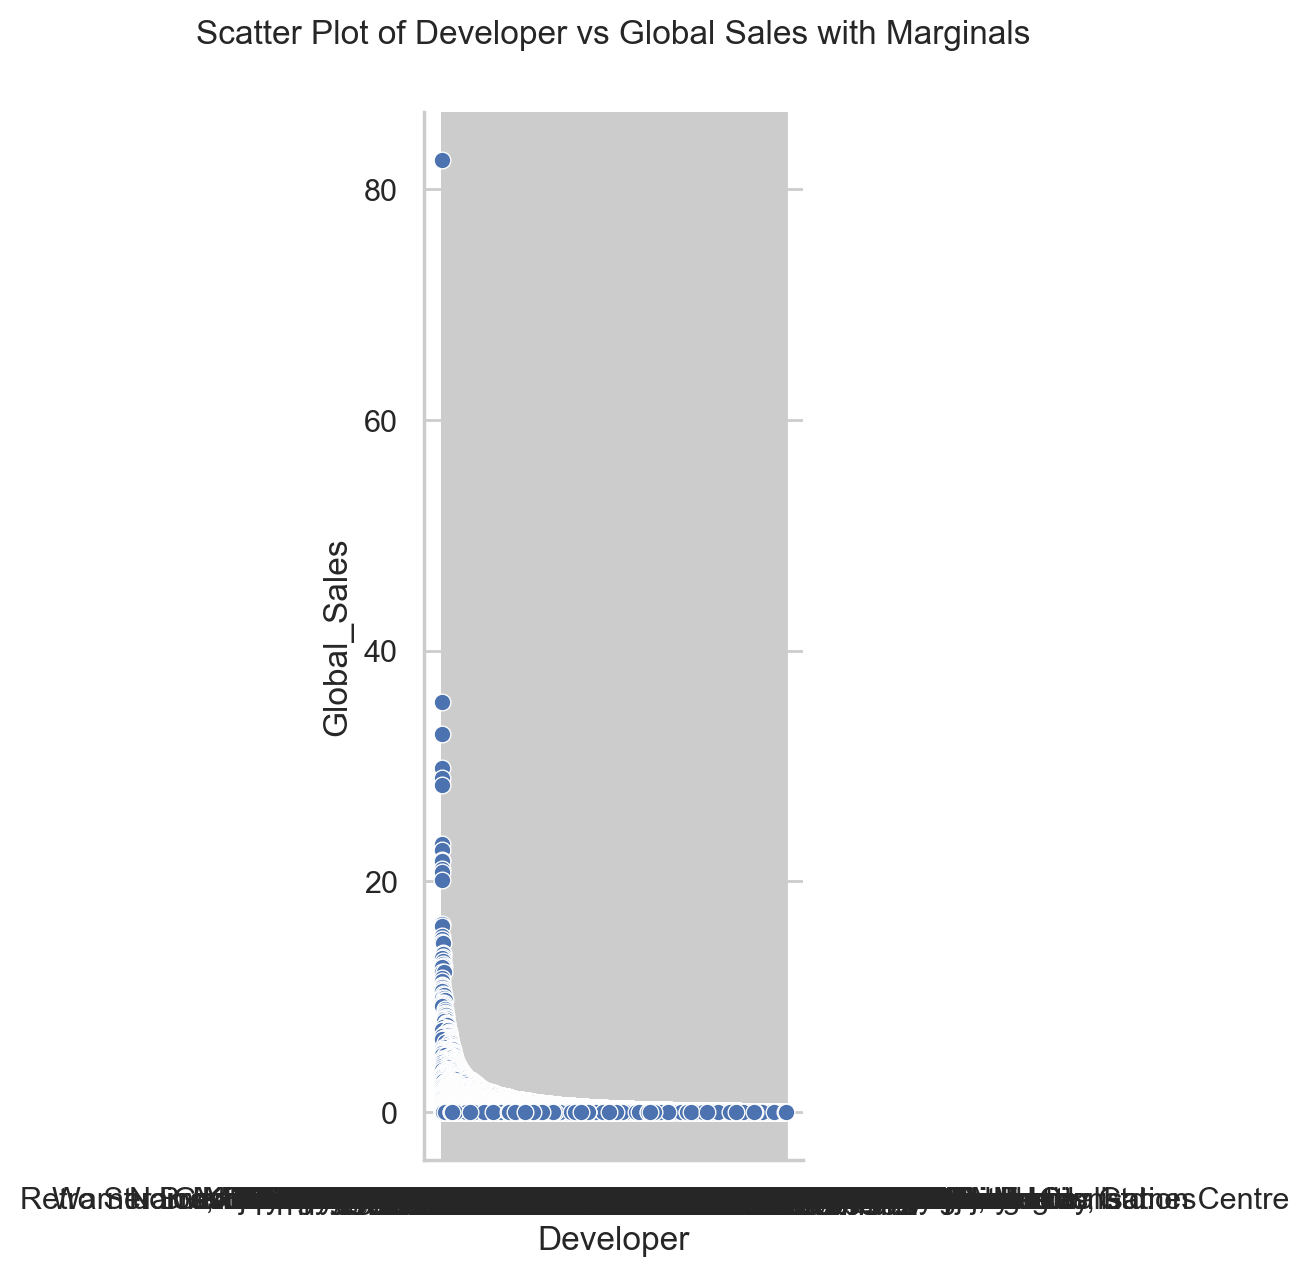

In [98]:
sns.set(style="whitegrid")
sns.pairplot(data_Frame, x_vars=["Developer"], y_vars=["Global_Sales"], kind="scatter", height=6, diag_kind="kde")

pyplot.title("Scatter Plot of Developer vs Global Sales with Marginals", y=1.05)
pyplot.show()


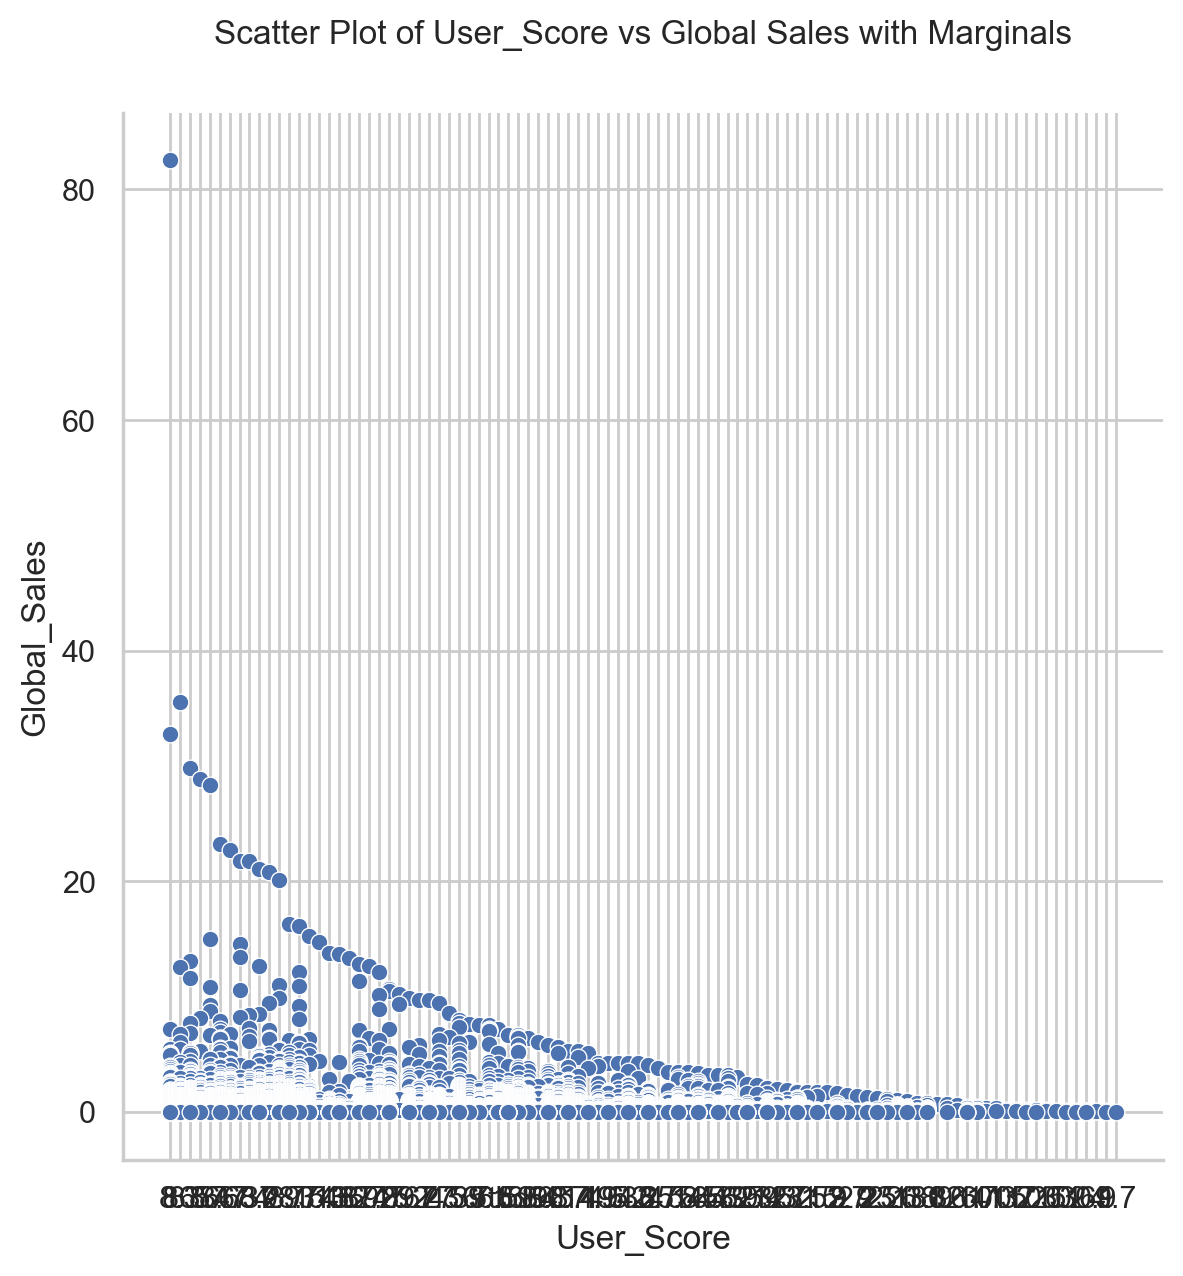

In [99]:
sns.set(style="whitegrid")
sns.pairplot(data_Frame, x_vars=["User_Score"], y_vars=["Global_Sales"], kind="scatter", height=6, diag_kind="kde")

pyplot.title("Scatter Plot of User_Score vs Global Sales with Marginals", y=1.05)
pyplot.show()


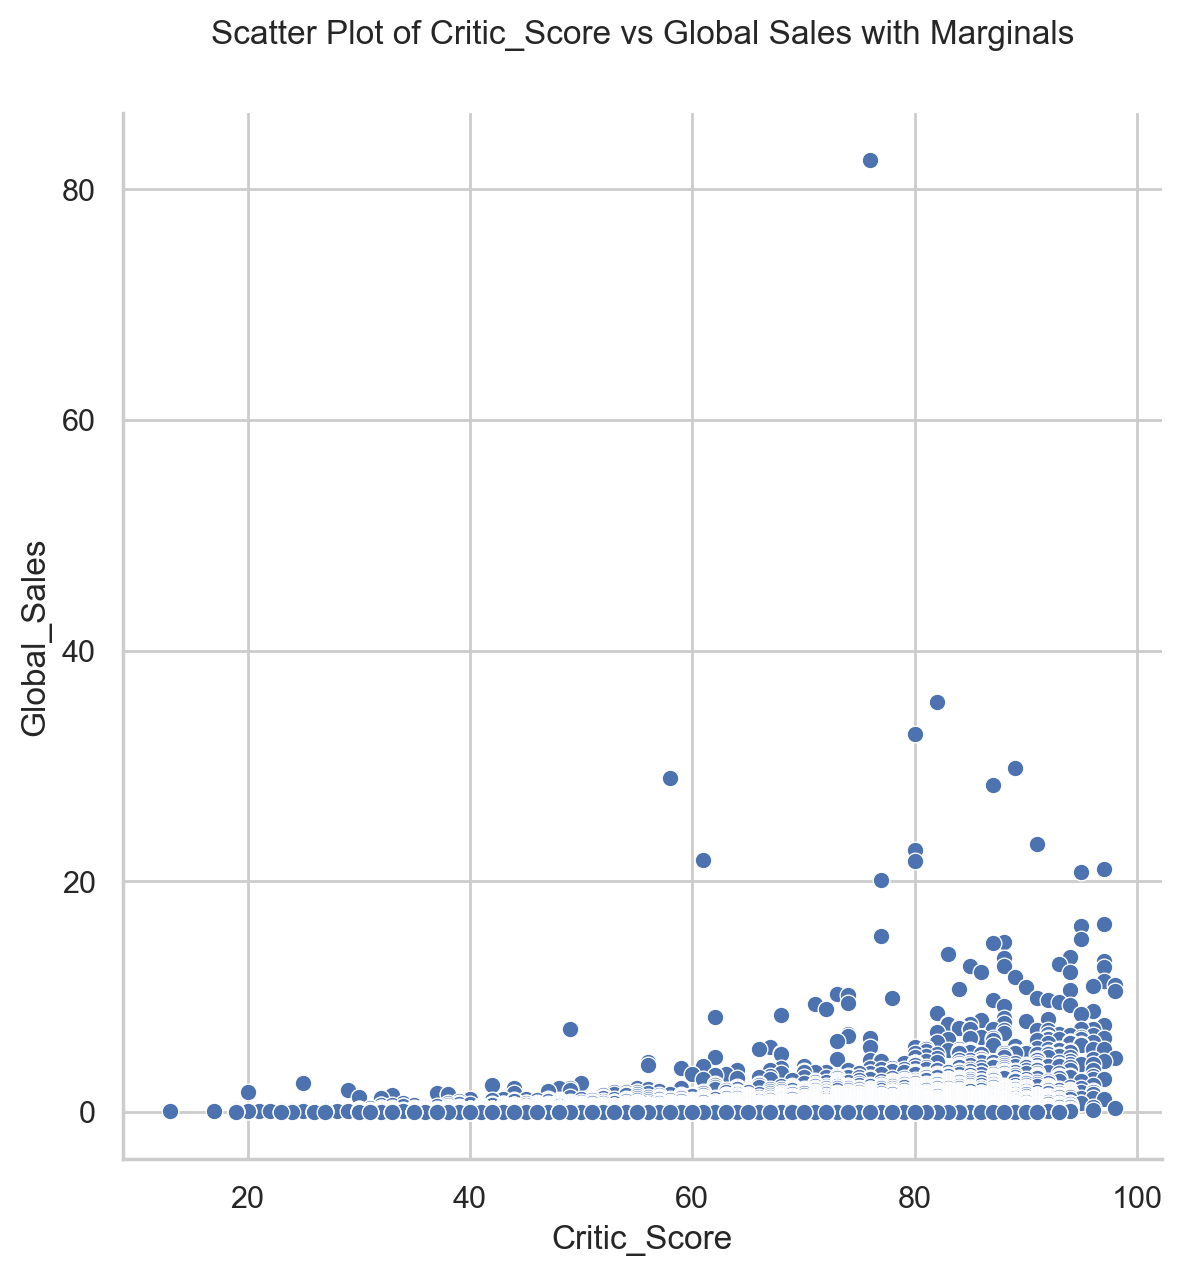

In [100]:
sns.set(style="whitegrid")
sns.pairplot(data_Frame, x_vars=["Critic_Score"], y_vars=["Global_Sales"], kind="scatter", height=6, diag_kind="kde")

pyplot.title("Scatter Plot of Critic_Score vs Global Sales with Marginals", y=1.05)
pyplot.show()


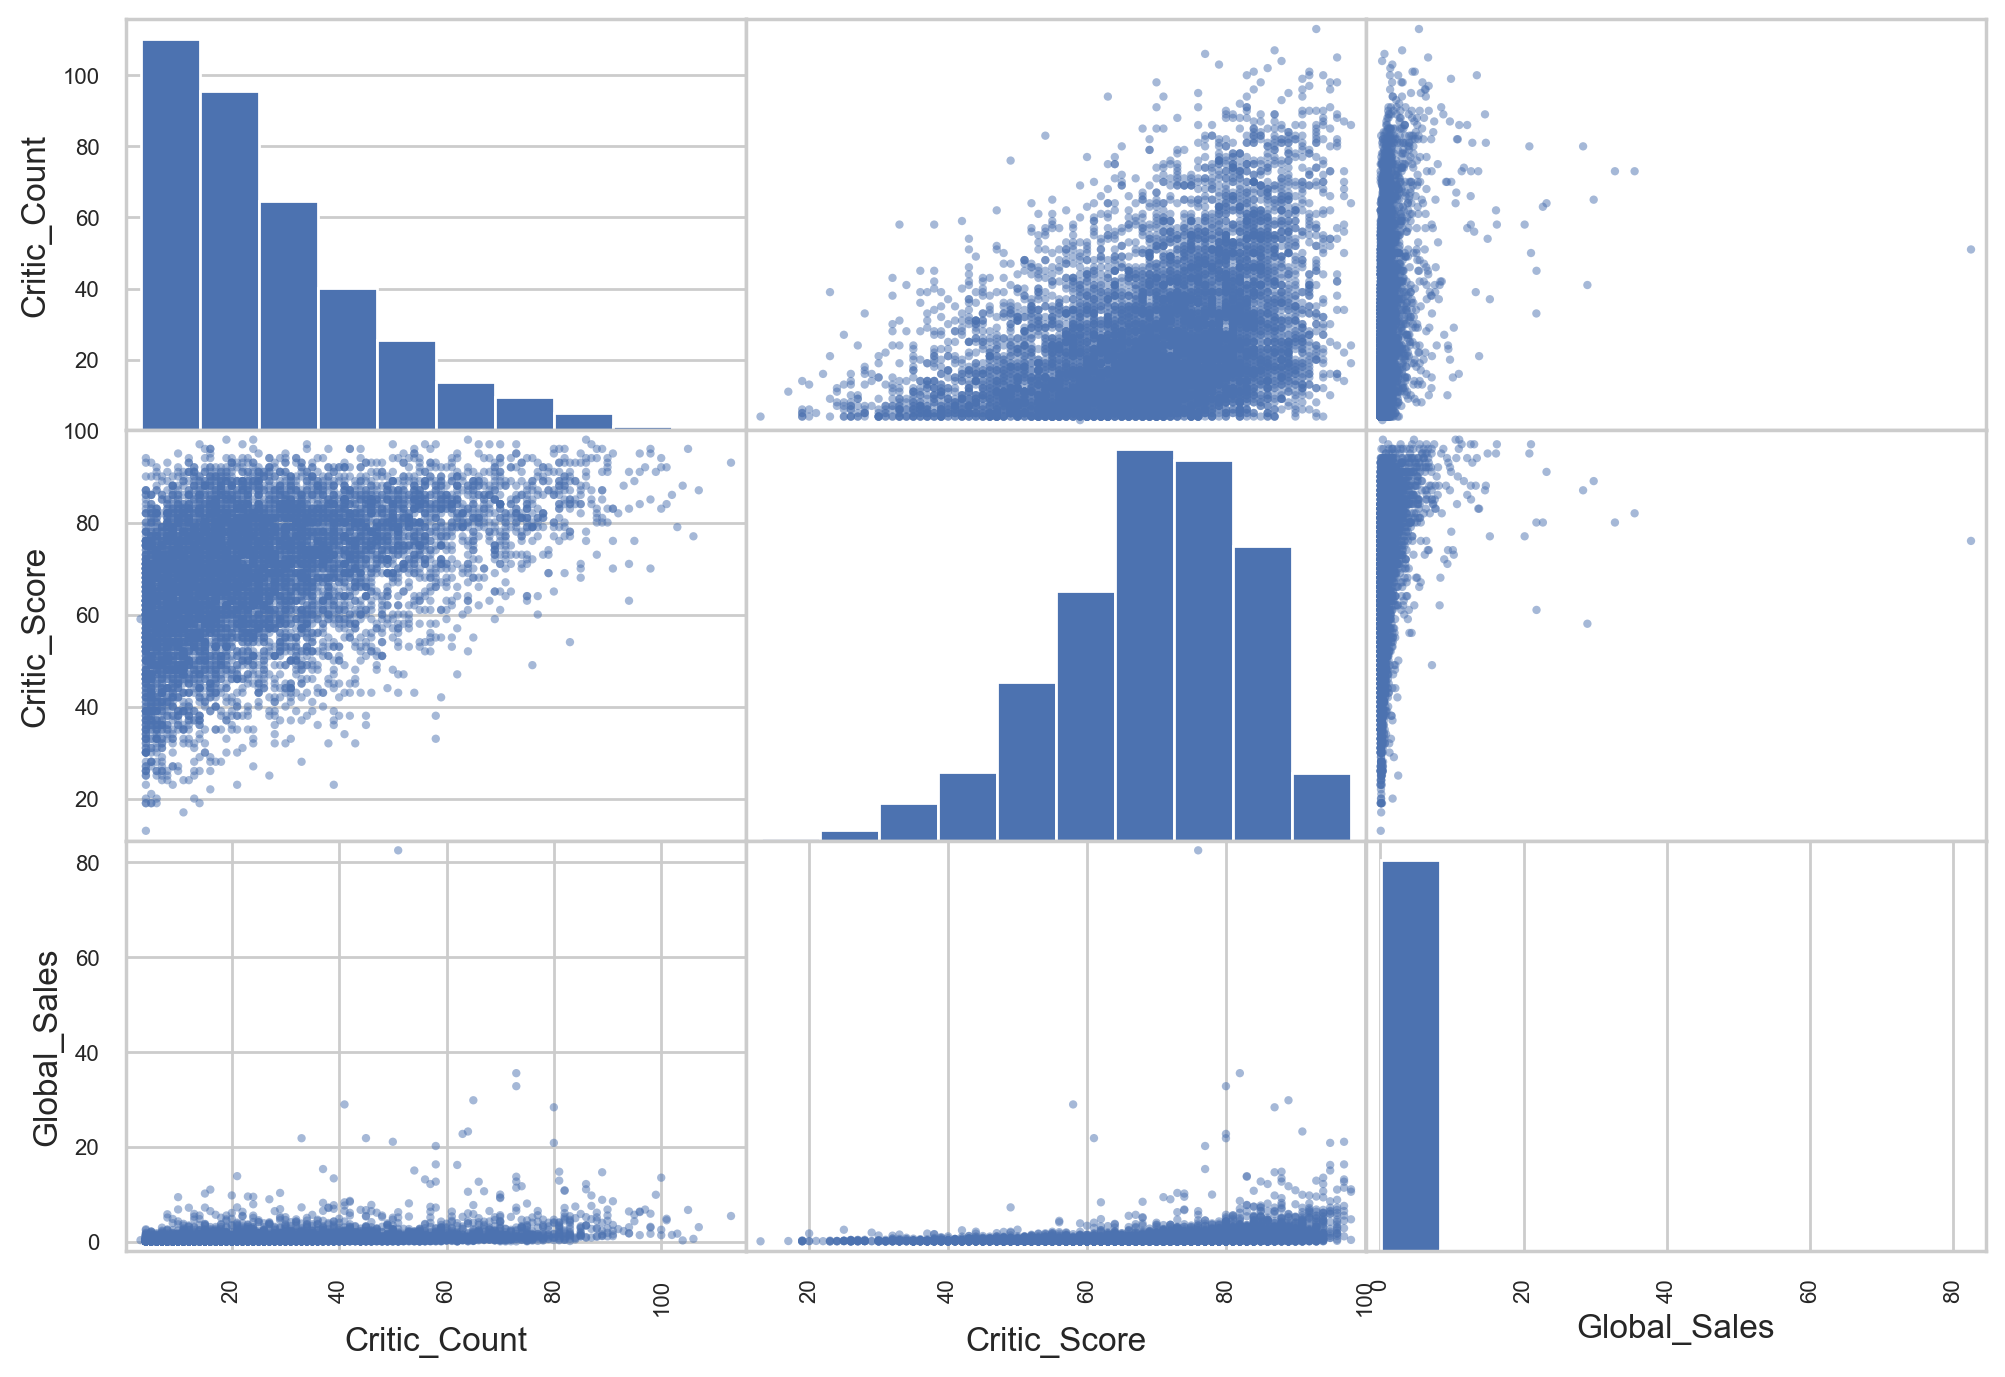

In [101]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["Critic_Count", "Critic_Score",
              "Global_Sales"]

scatter_matrix(data_Frame[attributes], figsize=(12, 8))
plt.show()


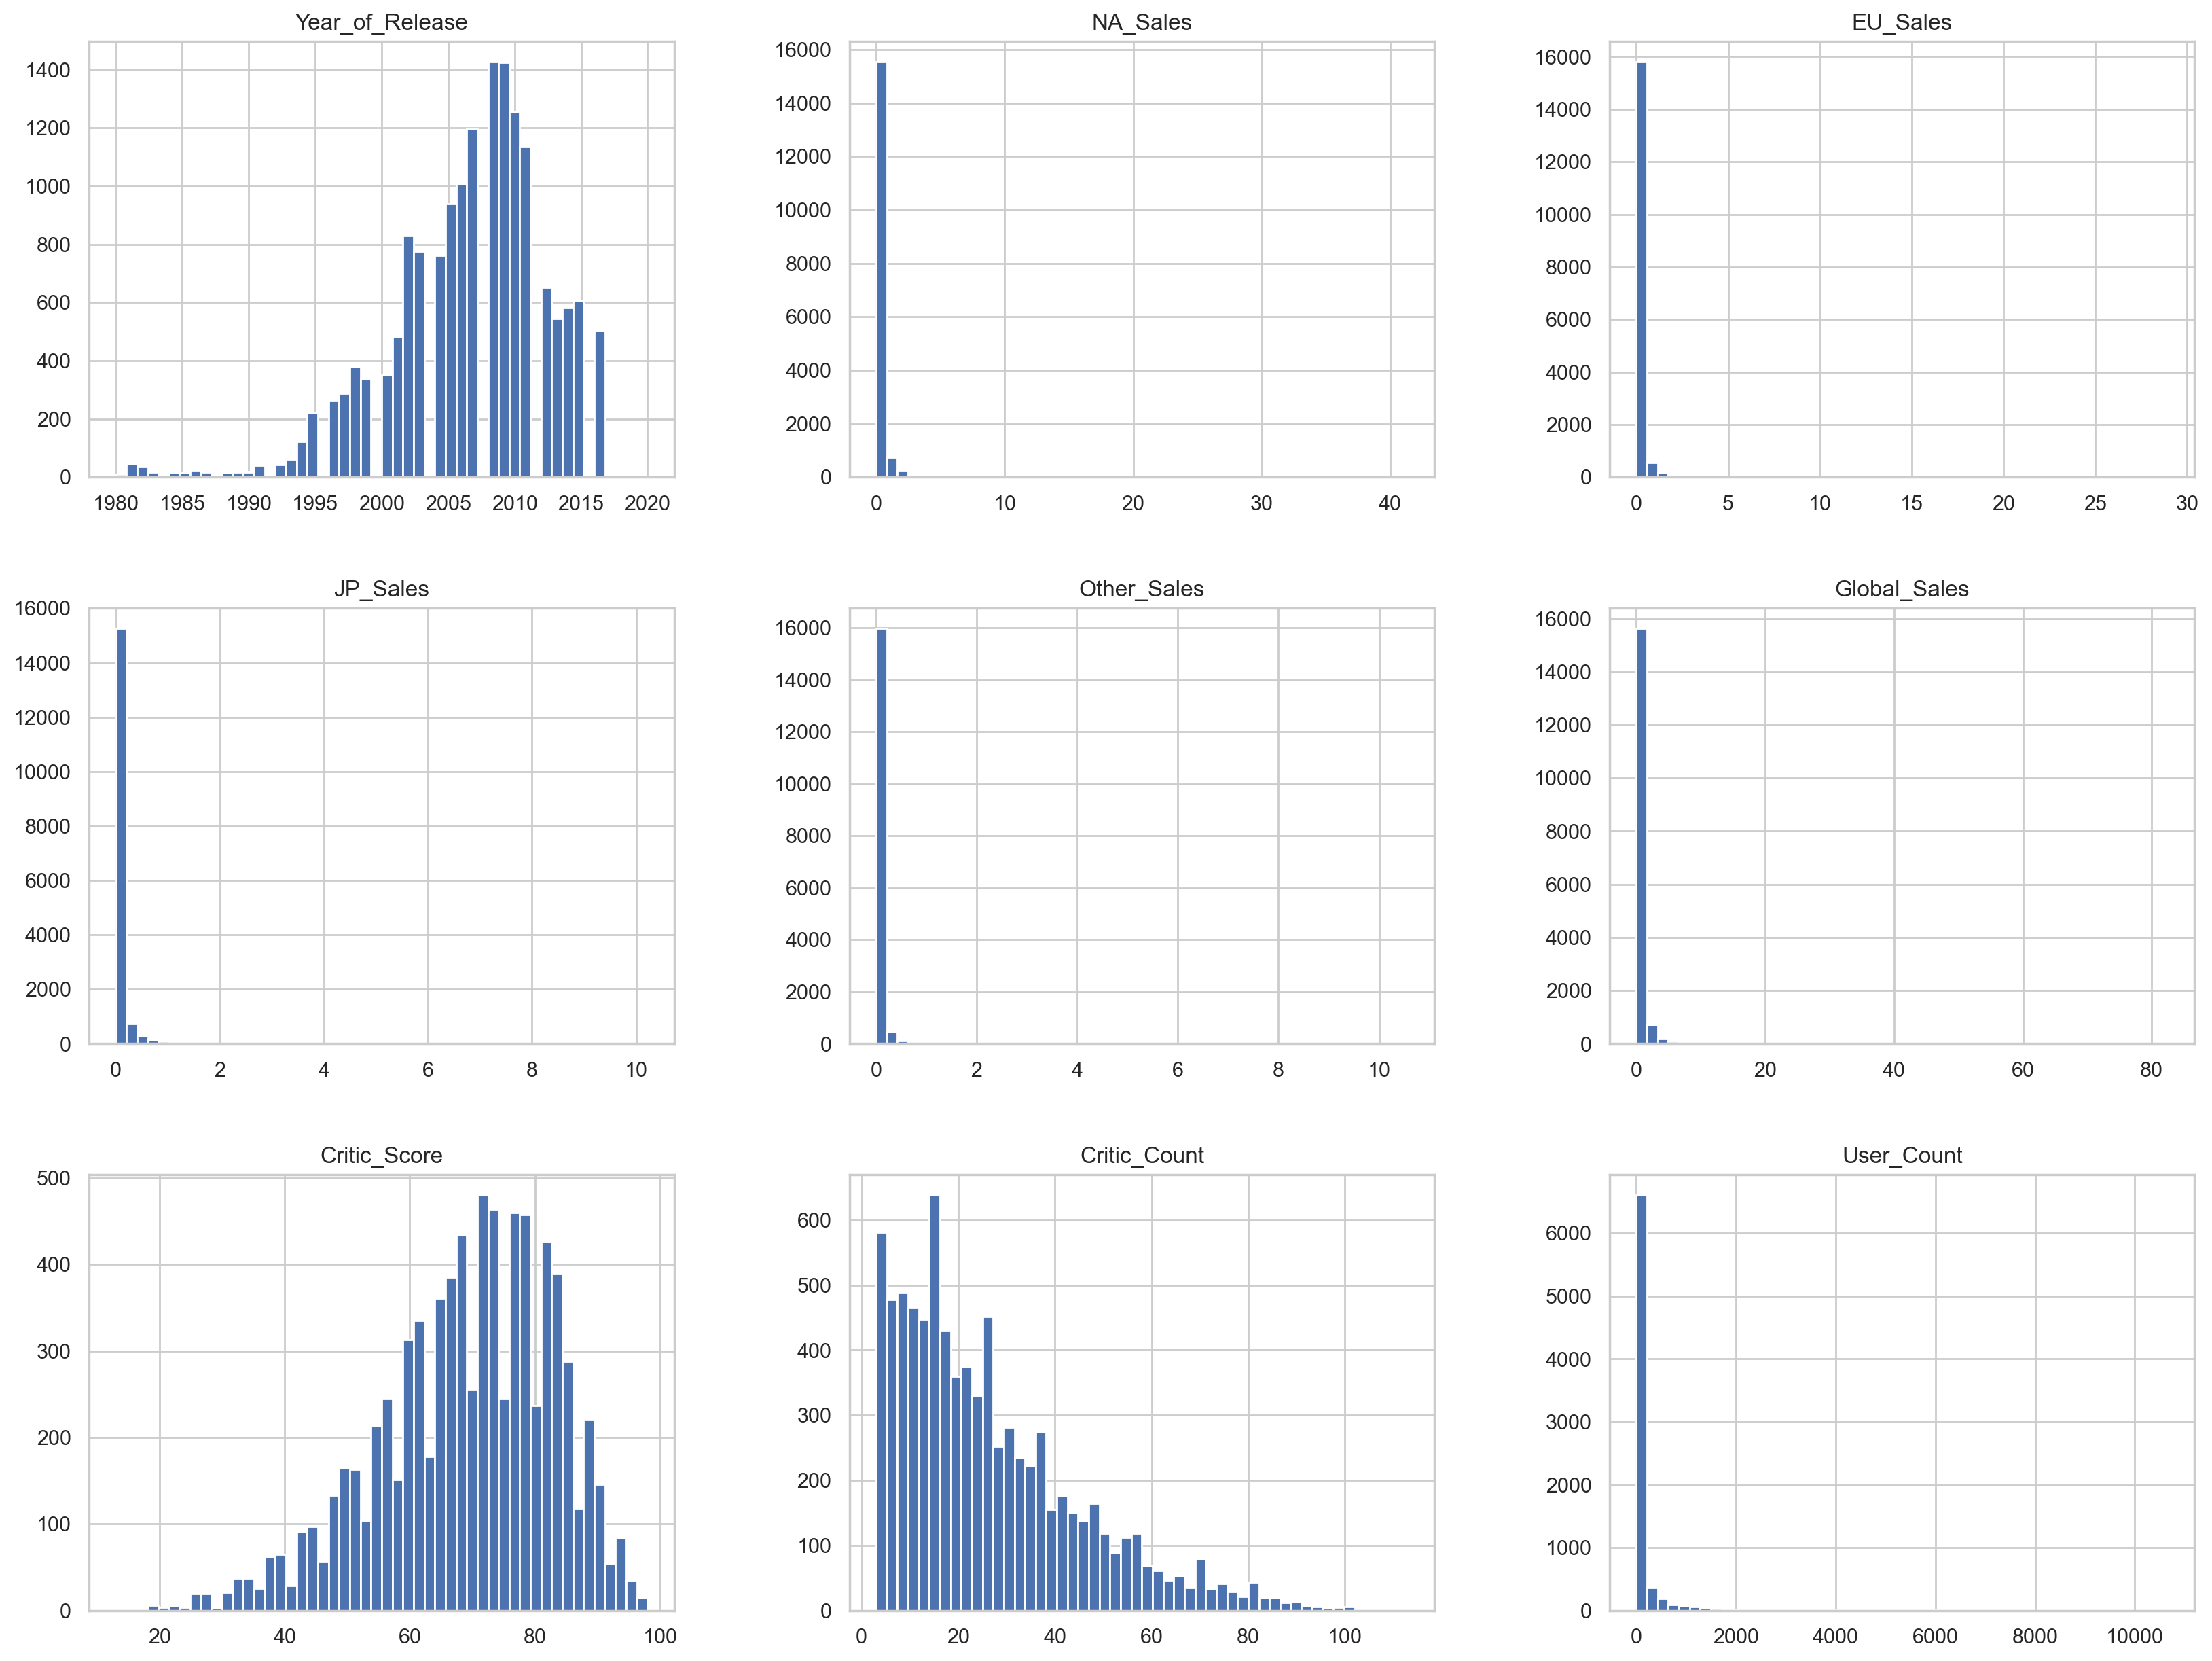

In [102]:
data_Frame.hist(bins=50, figsize=(20, 15))
plt.show()


## Data cleaning:

A graph of the data with NNa


<AxesSubplot:>

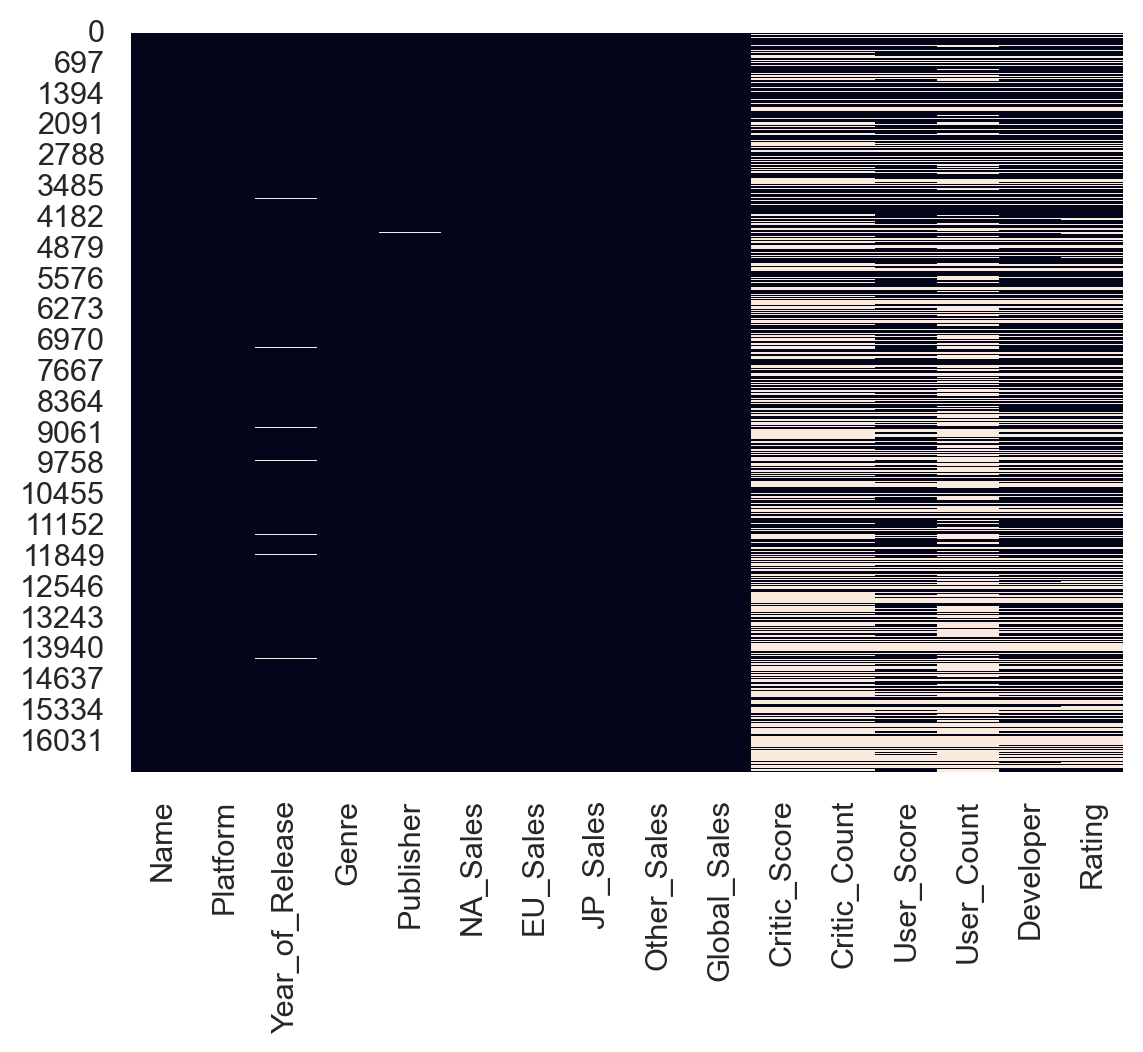

In [103]:
sns.heatmap(data_Frame.isnull(), cbar=False)


In [104]:
data_Frame.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

We deleted the user_count column because it contains a lot of NNa and because it does not greatly affect the Global_Sales column

In [3]:
data_Frame.drop('User_Count', axis=1, inplace=True)
data_Frame.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
Developer          6623
Rating             6769
dtype: int64

 In this code we will fills missing values in the Year_of_Release column with the mode, converts the column to integers, and checks for any remaining missing values in the dataset.

In [4]:
data_Frame['Year_of_Release'] = data_Frame['Year_of_Release'].fillna(data_Frame['Year_of_Release'].mode()[0])
data_Frame['Year_of_Release'] = data_Frame['Year_of_Release'].astype('int64')
data_Frame.isna().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
Developer          6623
Rating             6769
dtype: int64

We have discovered that the user_score There is a value called 'tbd'
That is, this game was not rated by users, so we converted it to NNa and then cleaned this value

In [5]:
data_Frame['User_Score'] = data_Frame['User_Score'].replace('tbd', np.nan)

median_user_score = data_Frame['User_Score'][data_Frame['User_Score'].notna()].astype(float).median()

data_Frame['User_Score'] = data_Frame['User_Score'].fillna(median_user_score)


We deleted all the NNa values ​​because it is difficult to clean them all, so the data went from 16,000 rows to 8,000 rows without any NNa.


In [6]:
data_Frame=data_Frame.dropna()
data_Frame

Name Platform  Year_of_Release     Genre  \
0                   Wii Sports      Wii             2006    Sports   
2               Mario Kart Wii      Wii             2008    Racing   
3            Wii Sports Resort      Wii             2009    Sports   
6        New Super Mario Bros.       DS             2006  Platform   
7                     Wii Play      Wii             2006      Misc   
...                        ...      ...              ...       ...   
16699          Planet Monsters      GBA             2001    Action   
16700                   Breach       PC             2011   Shooter   
16701         Bust-A-Move 3000       GC             2003    Puzzle   
16702         Mega Brain Boost       DS             2008    Puzzle   
16706  STORM: Frontline Nation       PC             2011  Strategy   

                   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                   Nintendo     41.36     28.96      3.77         8.45   
2                   Nintendo     15.68     12.76      3.79         3.29   
3                   Nintendo     15.61     10.93      3.28         2.95   
6                   Nintendo     11.28      9.14      6.50         2.88   
7                   Nintendo     13.96      9.18      2.93         2.84   
...                      ...       ...       ...       ...          ...   
16699                  Titus      0.01      0.00      0.00         0.00   
16700              Destineer      0.01      0.00      0.00         0.00   
16701                Ubisoft      0.01      0.00      0.00         0.00   
16702  Majesco Entertainment      0.01      0.00      0.00         0.00   
16706                Unknown      0.00      0.01      0.00         0.00   

       Global_Sales  Critic_Score  Critic_Count User_Score  \
0             82.53          76.0          51.0          8   
2             35.52          82.0          73.0        8.3   
3             32.77          80.0          73.0          8   
6             29.80          89.0          65.0        8.5   
7             28.92          58.0          41.0        6.6   
...             ...           ...           ...        ...   
16699          0.01          67.0           9.0        7.5   
16700          0.01          61.0          12.0        5.8   
16701          0.01          53.0           4.0        7.5   
16702          0.01          48.0          10.0        7.5   
16706          0.01          60.0          12.0        7.2   

                Developer Rating  
0                Nintendo      E  
2                Nintendo      E  
3                Nintendo      E  
6                Nintendo      E  
7                Nintendo      E  
...                   ...    ...  
16699  Planet Interactive      E  
16700        Atomic Games      T  
16701   Taito Corporation      E  
16702  Interchannel-Holon      E  
16706              SimBin   E10+  

[8050 rows x 15 columns]

A graph of the data without NNa


<AxesSubplot:>

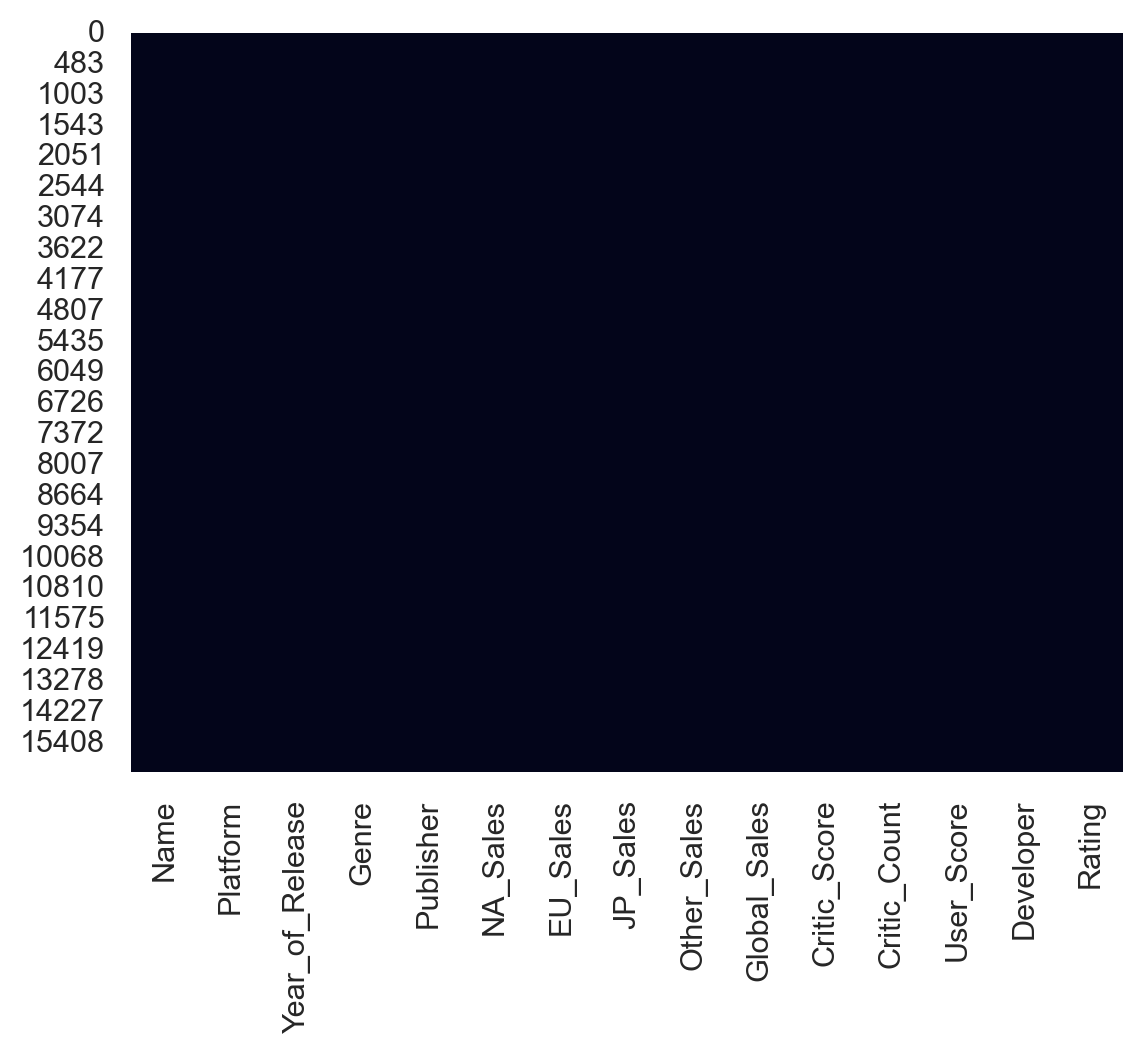

In [109]:
sns.heatmap(data_Frame.isnull(), cbar=False)

In [110]:
data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8050 entries, 0 to 16706
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8050 non-null   object 
 1   Platform         8050 non-null   object 
 2   Year_of_Release  8050 non-null   int64  
 3   Genre            8050 non-null   object 
 4   Publisher        8050 non-null   object 
 5   NA_Sales         8050 non-null   float64
 6   EU_Sales         8050 non-null   float64
 7   JP_Sales         8050 non-null   float64
 8   Other_Sales      8050 non-null   float64
 9   Global_Sales     8050 non-null   float64
 10  Critic_Score     8050 non-null   float64
 11  Critic_Count     8050 non-null   float64
 12  User_Score       8050 non-null   object 
 13  Developer        8050 non-null   object 
 14  Rating           8050 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 1006.2+ KB


## Prepare the data for Machine Learning algorithms

## Encoding

### one-hot-encoding


We used one-hot-encoding, but we quickly discovered that it is not suitable for the data we have...because every column contains a lot of uniqe, and this thing is difficult to deal with when using  one-hot-encoding.


In [111]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

data_Frame_OneHot = data_Frame.copy()

data_Frame_OneHot = pd.get_dummies(data_Frame_OneHot, columns=['Rating', 'Genre', 'Platform', 'Publisher'], drop_first=True)

print(data_Frame_OneHot.head())

                    Name  Year_of_Release  NA_Sales  EU_Sales  JP_Sales  \
0             Wii Sports             2006     41.36     28.96      3.77   
2         Mario Kart Wii             2008     15.68     12.76      3.79   
3      Wii Sports Resort             2009     15.61     10.93      3.28   
6  New Super Mario Bros.             2006     11.28      9.14      6.50   
7               Wii Play             2006     13.96      9.18      2.93   

   Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  ...  \
0         8.45         82.53          76.0          51.0          8  ...   
2         3.29         35.52          82.0          73.0        8.3  ...   
3         2.95         32.77          80.0          73.0          8  ...   
6         2.88         29.80          89.0          65.0        8.5  ...   
7         2.84         28.92          58.0          41.0        6.6  ...   

  Publisher_Xplosiv  Publisher_Xseed Games  Publisher_Yacht Club Games  \
0             Fals

### ordinal-encoding

We went to use OrdinalEncoder in its normal form...but there was also a problem with it, as it gives the order based on the letters of the alphabet...that is, in the Genre column, I give the action a zero and anything else that is higher than zero...and thus I understand that anything is better than the action...and that's it. A mistake because in representing the data, we thought that the action was the most important thing in the Genre column


In [112]:
from sklearn.preprocessing import OrdinalEncoder

data_Frame_Ordinal = data_Frame.copy()

ordinal_encoder = OrdinalEncoder()

encoded_columns = ordinal_encoder.fit_transform(data_Frame_Ordinal[['Rating', 'Genre', 'Platform', 'Publisher']])

data_Frame_Ordinal['Rating_Ordinal'] = encoded_columns[:, 0].astype(int)
data_Frame_Ordinal['Genre_Ordinal'] = encoded_columns[:, 1].astype(int)
data_Frame_Ordinal['Platform_Ordinal'] = encoded_columns[:, 2].astype(int)
data_Frame_Ordinal['Publisher_Ordinal'] = encoded_columns[:, 3].astype(int)

print(data_Frame_Ordinal.head())

                    Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii             2006    Sports  Nintendo   
2         Mario Kart Wii      Wii             2008    Racing  Nintendo   
3      Wii Sports Resort      Wii             2009    Sports  Nintendo   
6  New Super Mario Bros.       DS             2006  Platform  Nintendo   
7               Wii Play      Wii             2006      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score Developer Rating  Rating_Ordinal  Genre_Ordinal  \
0          51.0     

### OrdinalEncoder-with value_counts

In the end, we thought that the best way is to create an OrdinalEncoder for each column based on value_counts...that is, the action, for example, takes the highest value from Ordinal, which then becomes the highest one in value_counts.


In [7]:
from sklearn.preprocessing import OrdinalEncoder

data_Frame_Ordinal=data_Frame.copy()
rating_counts = data_Frame_Ordinal['Rating'].value_counts()
sorted_ratings = rating_counts.index.tolist()

Genre_counts = data_Frame_Ordinal['Genre'].value_counts()
sorted_Genre = Genre_counts.index.tolist()

Platform_counts = data_Frame_Ordinal['Platform'].value_counts()
sorted_Platform = Platform_counts.index.tolist()

Publisher_counts = data_Frame_Ordinal['Publisher'].value_counts()
sorted_Publisher = Publisher_counts.index.tolist()



categories_list = [
    sorted_ratings[::-1], 
    sorted_Genre[::-1],
    sorted_Platform[::-1], 
    sorted_Publisher[::-1],
]

ordinal_encoder = OrdinalEncoder(categories=categories_list)

encoded_columns = ordinal_encoder.fit_transform(data_Frame_Ordinal[['Rating', 'Genre','Platform','Publisher']])  

data_Frame_Ordinal['Rating_Ordinal'] = encoded_columns[:, 0].astype(int) 
data_Frame_Ordinal['Genre_Ordinal'] = encoded_columns[:, 1].astype(int)  
data_Frame_Ordinal['Platform_Ordinal'] = encoded_columns[:, 2].astype(int)  
data_Frame_Ordinal['Publisher_Ordinal'] = encoded_columns[:, 3].astype(int)  





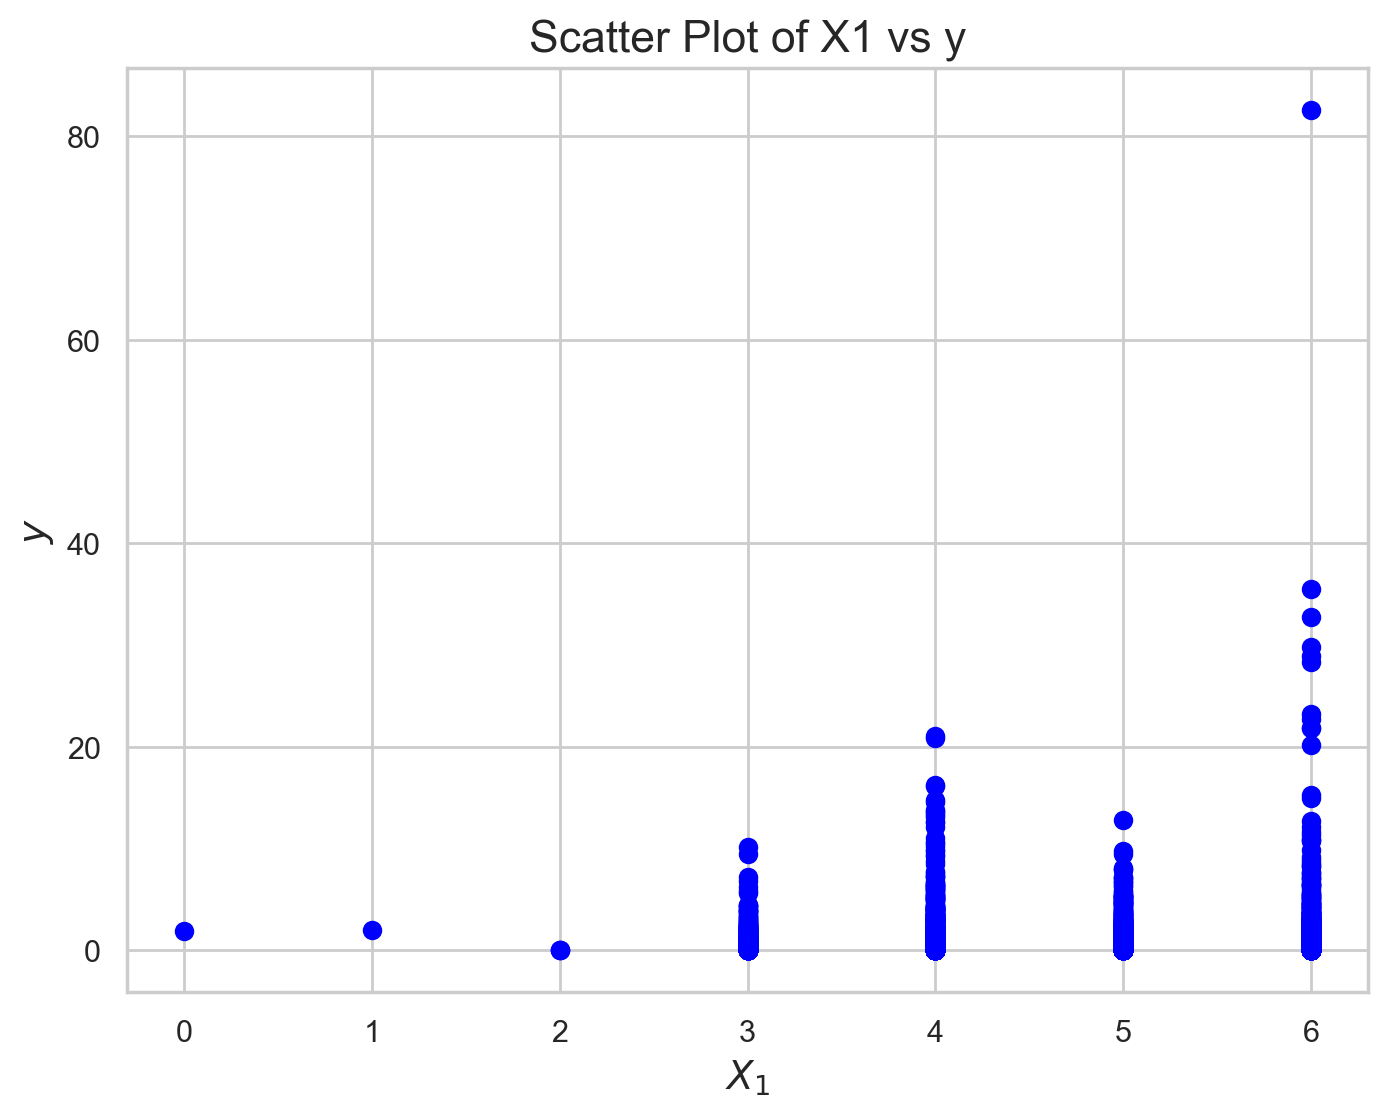

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

X = data_Frame_Ordinal[['Rating_Ordinal']].values
y = data_Frame_Ordinal['Global_Sales'].values

plt.figure(figsize=(8, 6)) 
plt.scatter(X, y, color='blue')  
plt.xlabel(r'$X_1$', fontsize=14)  
plt.ylabel(r'$y$', fontsize=14)  
plt.title("Scatter Plot of X1 vs y", fontsize=16)  

plt.grid(True)  
plt.show()


### Normalization


#### using MinMaxScaler


In [8]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score','Year_of_Release',
                      'Rating_Ordinal', 'Genre_Ordinal', 'Platform_Ordinal', 'Publisher_Ordinal','Other_Sales' 
                    ]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_Frame_minmax = data_Frame_Ordinal.copy()
data_Frame_minmax[numerical_features] = min_max_scaler.fit_transform(data_Frame_Ordinal[numerical_features])

print("Min-Max Scaled Data:")
print(data_Frame_minmax.head())


Min-Max Scaled Data:
                    Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii         0.677419    Sports  Nintendo   
2         Mario Kart Wii      Wii         0.741935    Racing  Nintendo   
3      Wii Sports Resort      Wii         0.774194    Sports  Nintendo   
6  New Super Mario Bros.       DS         0.677419  Platform  Nintendo   
7               Wii Play      Wii         0.677419      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77     0.799432      1.000000      0.741176   
2     15.68     12.76      3.79     0.311258      0.430320      0.811765   
3     15.61     10.93      3.28     0.279092      0.396995      0.788235   
6     11.28      9.14      6.50     0.272469      0.361003      0.894118   
7     13.96      9.18      2.93     0.268685      0.350339      0.529412   

   Critic_Count  User_Score Developer Rating  Rating_Ordinal  Genre_Ordinal  

#### using StandardScaler

In [116]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
data_Frame_standardized = data_Frame_Ordinal.copy()
data_Frame_standardized[numerical_features] = standard_scaler.fit_transform(data_Frame_Ordinal[numerical_features])

print("Standardized Data:")
print(data_Frame_standardized.head())


Standardized Data:
                    Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii        -0.282312    Sports  Nintendo   
2         Mario Kart Wii      Wii         0.202408    Racing  Nintendo   
3      Wii Sports Resort      Wii         0.444768    Sports  Nintendo   
6  New Super Mario Bros.       DS        -0.282312  Platform  Nintendo   
7               Wii Play      Wii        -0.282312      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77    33.449107     44.833948      0.503564   
2     15.68     12.76      3.79    12.845212     19.079237      0.933763   
3     15.61     10.93      3.28    11.487591     17.572633      0.790363   
6     11.28      9.14      6.50    11.208081     15.945500      1.435661   
7     13.96      9.18      2.93    11.048361     15.463387     -0.787032   

   Critic_Count  User_Score Developer Rating  Rating_Ordinal  Genre_Ordinal  \


# Select and train a model 

## using LinearRegression

Sample predictions:
[ 2.73016238e-02  1.57166586e-02  3.18894707e-03  2.20890481e-03
  2.17936352e-03 -7.97180109e-04  1.88609572e-03  1.12009068e-02
 -6.15129791e-05  9.79875055e-03]

Actual values:
[0.01987397 0.01090645 0.00145419 0.00206011 0.00084828 0.0007271
 0.00387785 0.00666505 0.00290839 0.02605429]
Mean Absolute Error of Linear Regression: 0.004035632215548804
Root Mean Squared Error of Linear Regression: 0.008606153500743039
R^2 Score: 0.72187023030076


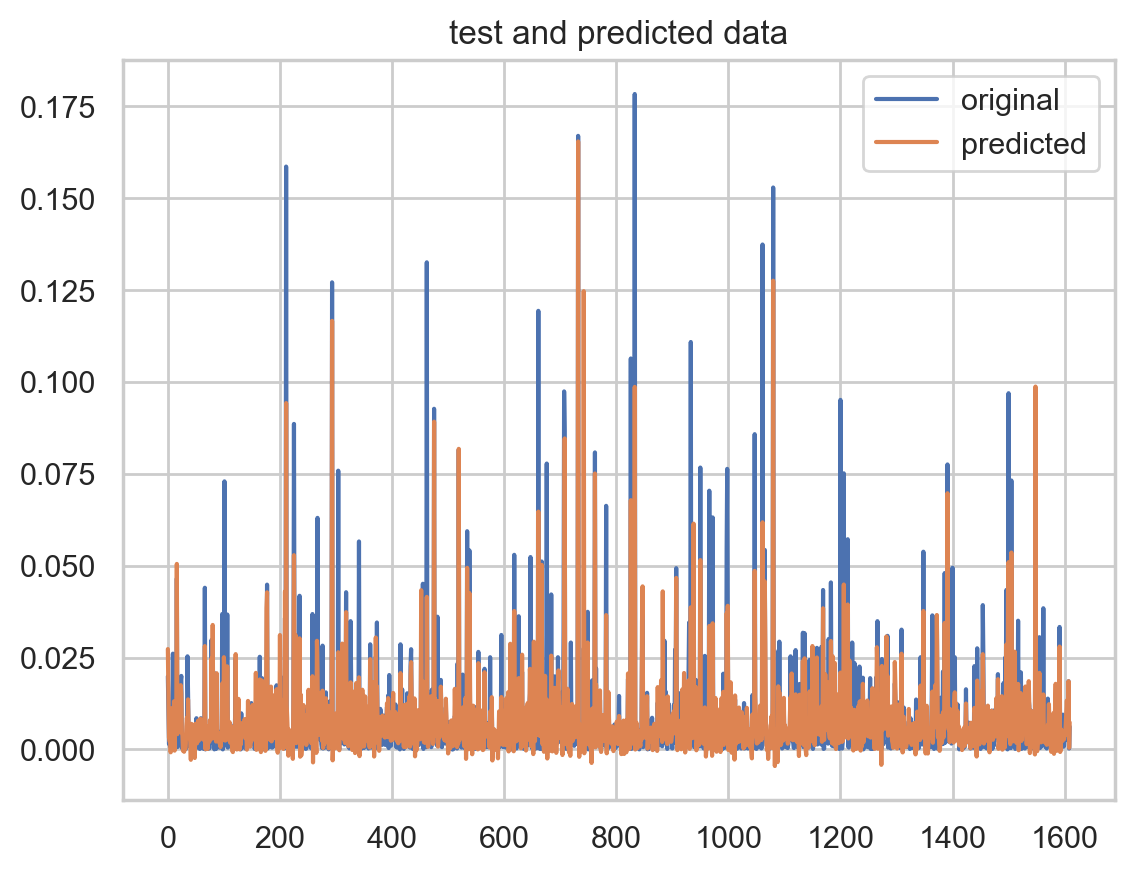

In [121]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data_Frame_minmax[['Platform_Ordinal', 'Genre_Ordinal', 'Critic_Score', 'Rating_Ordinal','Publisher_Ordinal','Critic_Count','User_Score','Other_Sales']].values
y = data_Frame_minmax['Global_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = linear_model.LinearRegression()
linreg_model = linreg.fit(X_train, y_train)

linreg_pred = linreg_model.predict(X_test)

print("Sample predictions:")
print(linreg_pred[:10])  

print("\nActual values:")
print(y_test[:10])  

print('Mean Absolute Error of Linear Regression:', metrics.mean_absolute_error(y_test, linreg_pred))
print('Root Mean Squared Error of Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, linreg_pred)))

r2 = r2_score(y_test, linreg_pred)
print(f"R^2 Score: {r2}")

x_ax = range(len(y_test))
pyplot.plot(x_ax, y_test, label="original")
pyplot.plot(x_ax, linreg_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()


## using PolynomialFeatures

R^2 Score for Polynomial Regression: 0.8231042153714209


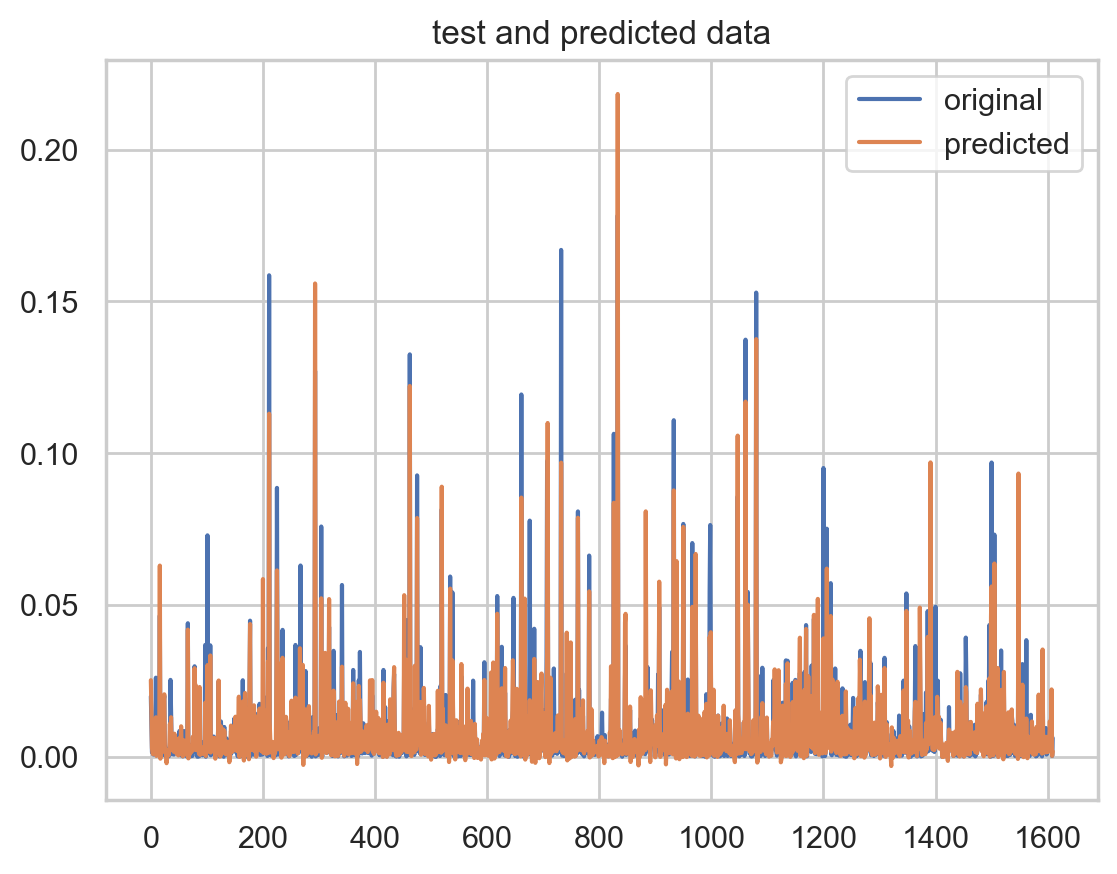

In [122]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

linreg_poly = linear_model.LinearRegression()
linreg_poly.fit(X_train_poly, y_train_poly)
poly_pred = linreg_poly.predict(X_test_poly)

print("R^2 Score for Polynomial Regression:", r2_score(y_test_poly, poly_pred))

x_ax = range(len(y_test))
pyplot.plot(x_ax, y_test, label="original")
pyplot.plot(x_ax, poly_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()


## using RandomForestRegressor

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

rf_pred = best_model.predict(X_test)
print(f"R^2 Score on test data: {r2_score(y_test, rf_pred)}")


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


KeyboardInterrupt: 

Sample predictions:
[0.02738927 0.01409388 0.00261624 0.002573   0.00110178 0.0007533
 0.00284747 0.00812186 0.00410711 0.01349255]

Actual values:
[0.01987397 0.01090645 0.00145419 0.00206011 0.00084828 0.0007271
 0.00387785 0.00666505 0.00290839 0.02605429]
Mean Absolute Error of Random Forest: 0.002299091135526045
Root Mean Squared Error of Random Forest: 0.005967926147184291
R^2 Score: 0.8662554233120231


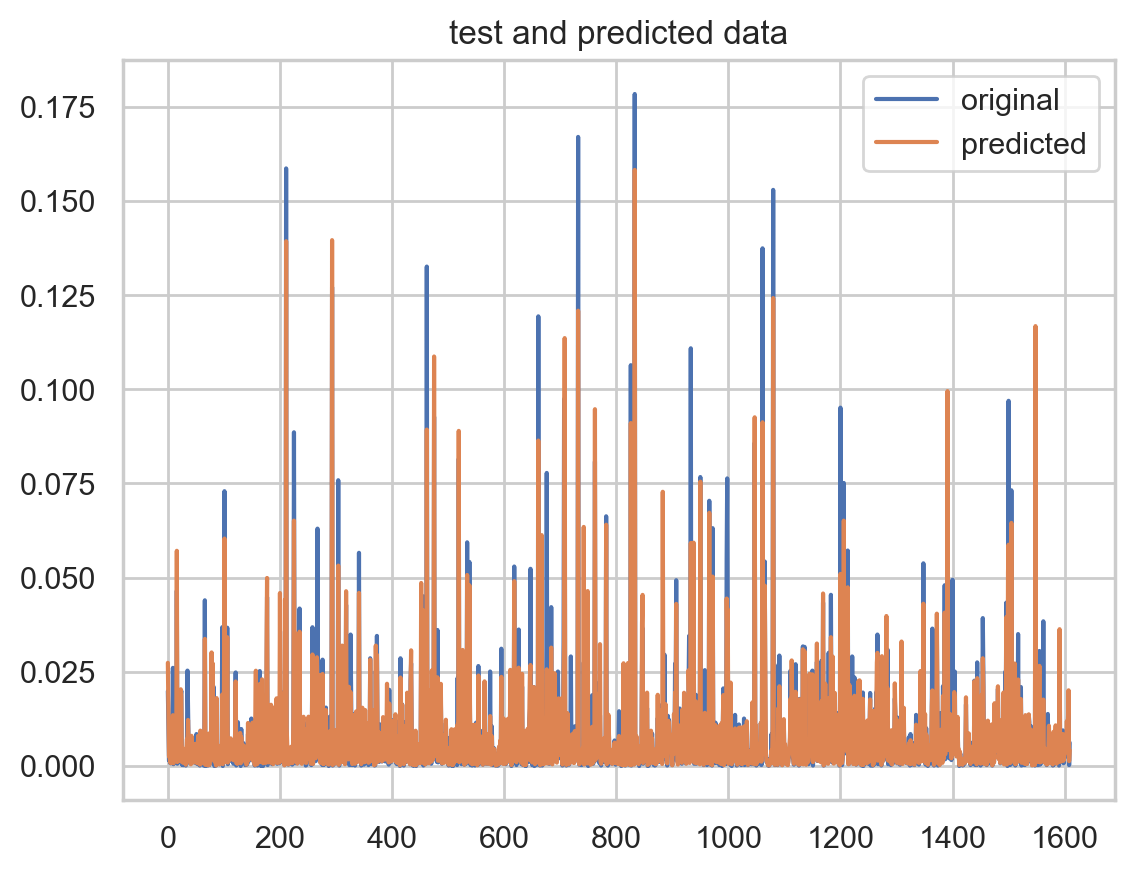

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


rf_model = RandomForestRegressor(n_estimators=185, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Sample predictions:")
print(rf_pred[:10])  

print("\nActual values:")
print(y_test[:10])  

print('Mean Absolute Error of Random Forest:', mean_absolute_error(y_test, rf_pred))
print('Root Mean Squared Error of Random Forest:', np.sqrt(mean_squared_error(y_test, rf_pred)))

r2 = r2_score(y_test, rf_pred)
print(f"R^2 Score: {r2}")

x_ax = range(len(y_test))
pyplot.plot(x_ax, y_test, label="original")
pyplot.plot(x_ax, rf_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()


## using XGBRegressor

Sample predictions:
[0.02788761 0.01160719 0.00223239 0.00258838 0.00098928 0.0013189
 0.0023633  0.00997132 0.00292657 0.01280057]

Actual values:
[0.01987397 0.01090645 0.00145419 0.00206011 0.00084828 0.0007271
 0.00387785 0.00666505 0.00290839 0.02605429]

Mean Absolute Error of XGBoost: 0.0030363425829709064
Root Mean Squared Error of XGBoost: 0.006688548006482206
R^2 Score: 0.832006299249452


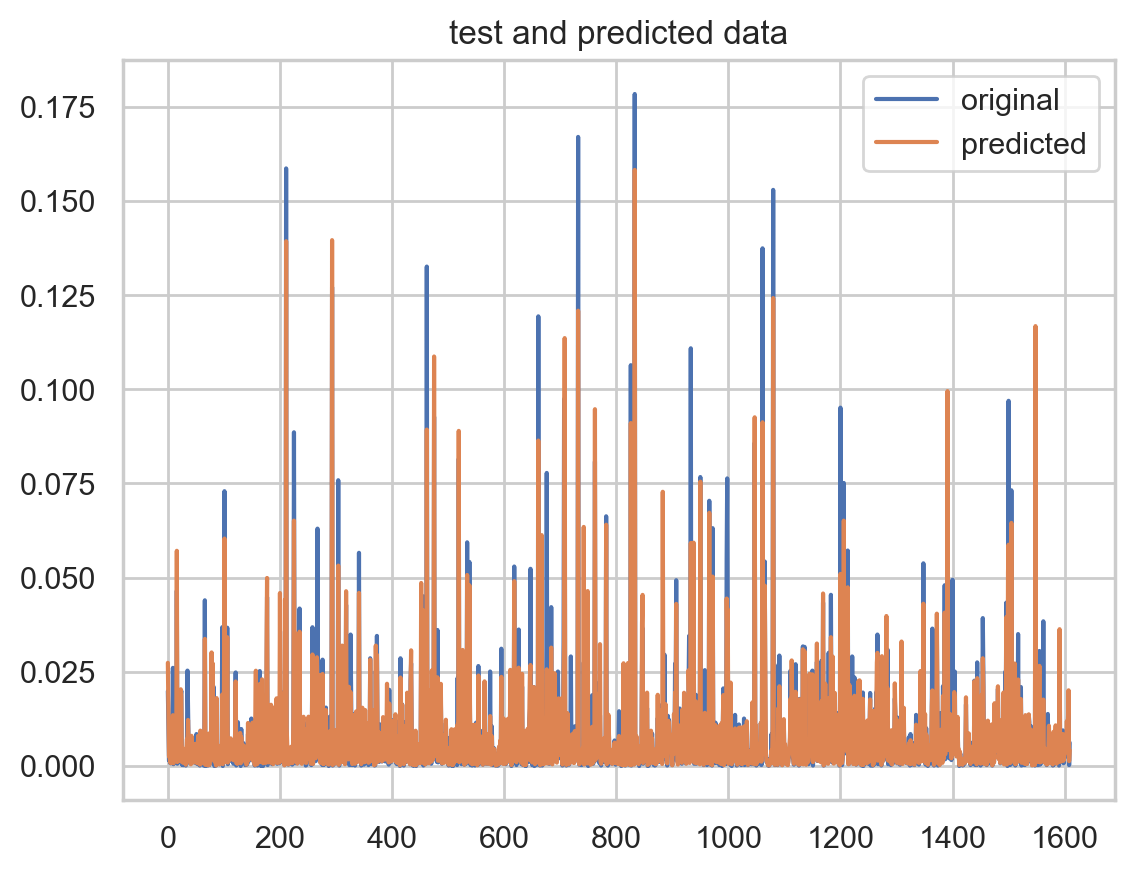

In [129]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, 
                         learning_rate=0.05, 
                         max_depth=9, 
                         random_state=42,
                         subsample=0.8, 
                         colsample_bytree=0.6,  
                         objective='reg:squarederror') 

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("Sample predictions:")
print(xgb_pred[:10])  

print("\nActual values:")
print(y_test[:10])  

mae = mean_absolute_error(y_test, xgb_pred)
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print(f'\nMean Absolute Error of XGBoost: {mae}')
print(f'Root Mean Squared Error of XGBoost: {rmse}')
r2 = r2_score(y_test, xgb_pred)
print(f"R^2 Score: {r2}")

x_ax = range(len(y_test))
pyplot.plot(x_ax, y_test, label="original")
pyplot.plot(x_ax, rf_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()

Sample predictions:
[0.02527465 0.01360692 0.00211893 0.00197028 0.00095851 0.00104996
 0.0015848  0.00966211 0.00273295 0.01100206]

Actual values:
[0.01987397 0.01090645 0.00145419 0.00206011 0.00084828 0.0007271
 0.00387785 0.00666505 0.00290839 0.02605429]
Mean Absolute Error of XGBoost: 0.0021188883550700434
Root Mean Squared Error of XGBoost: 0.005681133836810057
R^2 Score: 0.8788009149254227


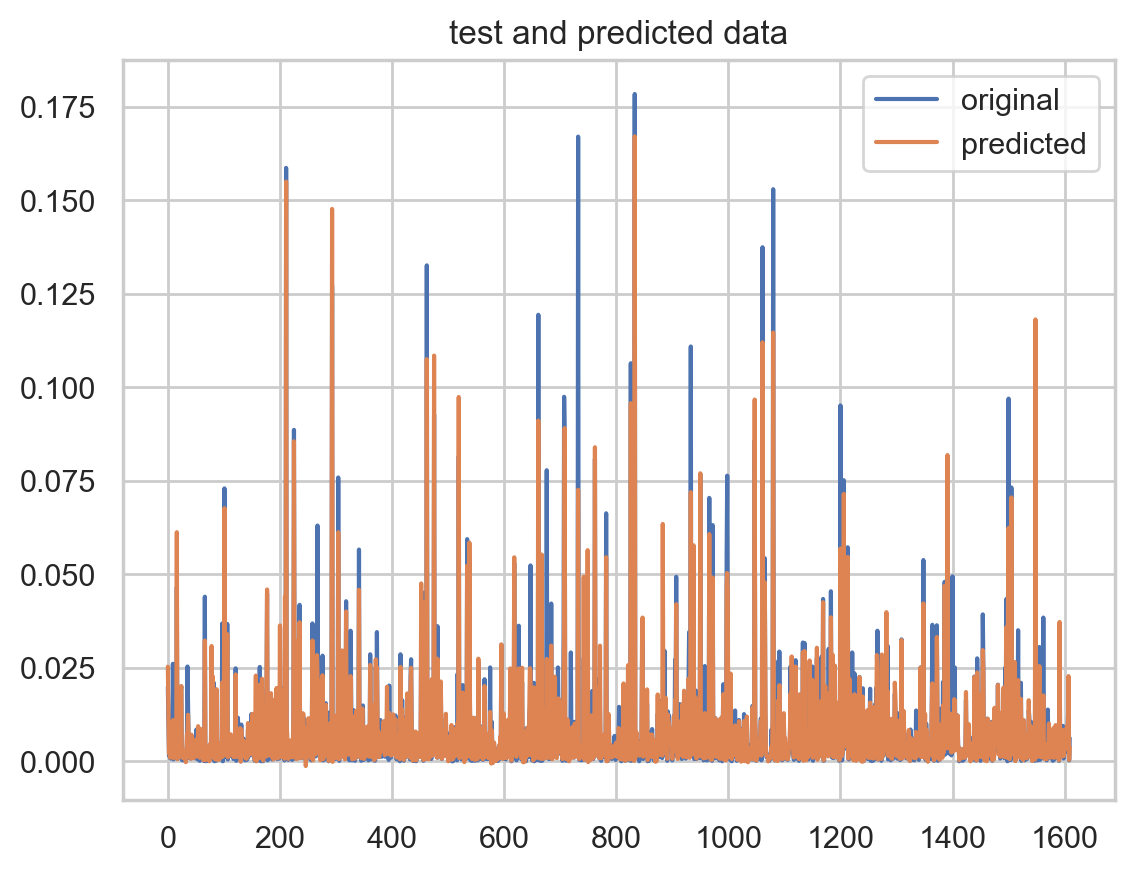

In [130]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("Sample predictions:")
print(xgb_pred[:10])  

print("\nActual values:")
print(y_test[:10])  

print('Mean Absolute Error of XGBoost:', mean_absolute_error(y_test, xgb_pred))
print('Root Mean Squared Error of XGBoost:', np.sqrt(mean_squared_error(y_test, xgb_pred)))

r2 = r2_score(y_test, xgb_pred)
print(f"R^2 Score: {r2}")

x_ax = range(len(y_test))
pyplot.plot(x_ax, y_test, label="original")
pyplot.plot(x_ax, xgb_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()

Sample predictions:
[0.02443905 0.01478415 0.00216542 0.00194506 0.00101389 0.00090674
 0.00142539 0.0095341  0.00286386 0.01273402]

Actual values:
[0.01987397 0.01090645 0.00145419 0.00206011 0.00084828 0.0007271
 0.00387785 0.00666505 0.00290839 0.02605429]

Mean Absolute Error of XGBoost: 0.0022091442251487227
Root Mean Squared Error of XGBoost: 0.00545143356406208
R^2 Score: 0.8884034553547508


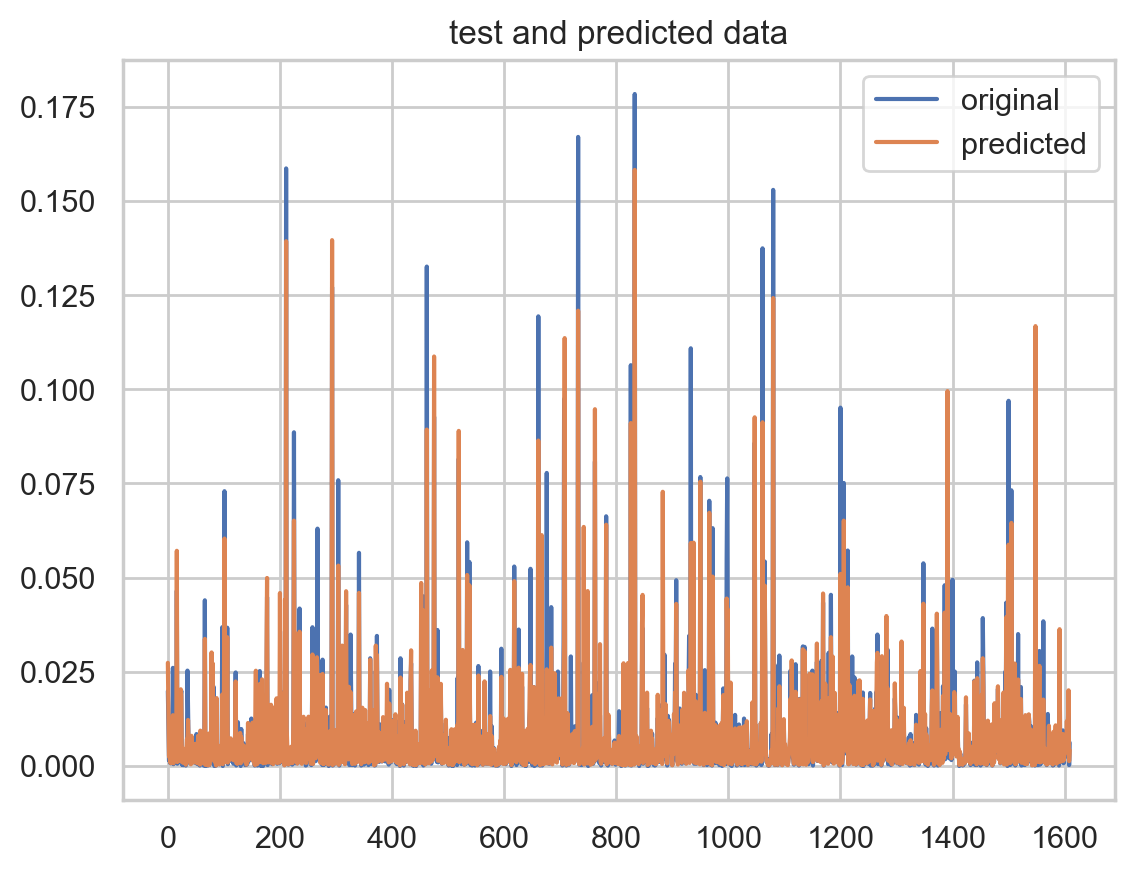

In [131]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, 
                         learning_rate=0.1, 
                         max_depth=6, 
                         random_state=42,
                         subsample=0.8,  
                         colsample_bytree=0.8, 
                         objective='reg:squarederror') 

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("Sample predictions:")
print(xgb_pred[:10])  

print("\nActual values:")
print(y_test[:10])  

mae = mean_absolute_error(y_test, xgb_pred)
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print(f'\nMean Absolute Error of XGBoost: {mae}')
print(f'Root Mean Squared Error of XGBoost: {rmse}')
r2 = r2_score(y_test, xgb_pred)
print(f"R^2 Score: {r2}")

x_ax = range(len(y_test))
pyplot.plot(x_ax, y_test, label="original")
pyplot.plot(x_ax, rf_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()

In [132]:

param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  
    'max_depth': [3, 4, 6, 8, 10],  
    'min_child_weight': [1, 3, 5, 7],  
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  
}

xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

best_predictions = best_model.predict(X_test)

mae = mean_absolute_error(y_test, best_predictions)
rmse = np.sqrt(mean_squared_error(y_test, best_predictions))
print(f'\nMean Absolute Error of XGBoost: {mae}')
print(f'Root Mean Squared Error of XGBoost: {rmse}')

r2 = r2_score(y_test, best_predictions)
print(f"R^2 Score: {r2}")


Fitting 3 folds for each of 12500 candidates, totalling 37500 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.7}

Mean Absolute Error of XGBoost: 0.0021829631645691595
Root Mean Squared Error of XGBoost: 0.005384446157017075
R^2 Score: 0.8911292092623633


Sample predictions:
[0.02575389 0.0140734  0.00232093 0.00191173 0.00114159 0.0010028
 0.00169265 0.0101617  0.00306793 0.01269046]

Actual values:
[0.01987397 0.01090645 0.00145419 0.00206011 0.00084828 0.0007271
 0.00387785 0.00666505 0.00290839 0.02605429]

Mean Absolute Error of XGBoost: 0.002168020108638622
Root Mean Squared Error of XGBoost: 0.005360071487119938
R^2 Score: 0.8921126653352736


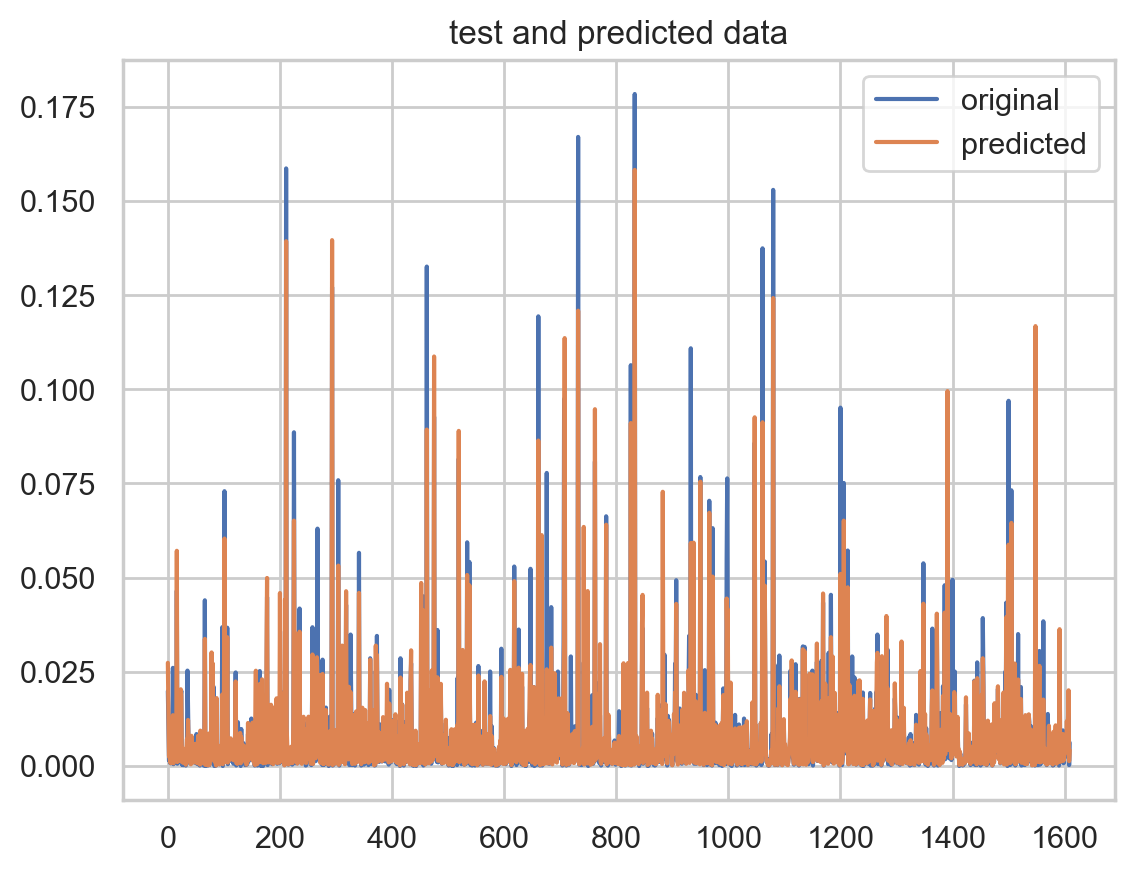

In [144]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=370, 
                         learning_rate=0.05, 
                         max_depth=6, 
                         min_child_weight=5,
                         random_state=42,
                         subsample=0.7,  
                         colsample_bytree=1.0, 
                         objective='reg:squarederror') 

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("Sample predictions:")
print(xgb_pred[:10])  

print("\nActual values:")
print(y_test[:10])  

mae = mean_absolute_error(y_test, xgb_pred)
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print(f'\nMean Absolute Error of XGBoost: {mae}')
print(f'Root Mean Squared Error of XGBoost: {rmse}')
r2 = r2_score(y_test, xgb_pred)
print(f"R^2 Score: {r2}")

x_ax = range(len(y_test))
pyplot.plot(x_ax, y_test, label="original")
pyplot.plot(x_ax, rf_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits
Best Parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.85}

Best Gradient Boosting Model Performance:
Mean Absolute Error (MAE): 0.0022
Root Mean Squared Error (RMSE): 0.0054
R^2 Score: 0.8913


NameError: name 'rf_pred' is not defined

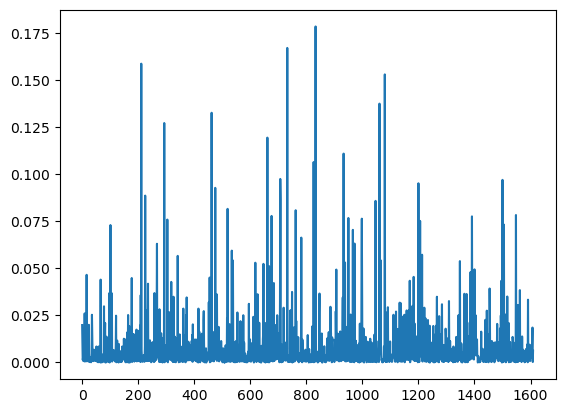

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data_Frame_minmax[['Platform_Ordinal', 'Genre_Ordinal', 'Critic_Score', 'Rating_Ordinal',
                       'Publisher_Ordinal', 'Critic_Count', 'User_Score', 'Other_Sales']].values
y = data_Frame_minmax['Global_Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200,300,350, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4,5, 6,7,8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.85, 1.0]
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_gbr = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters for Gradient Boosting Regressor:", best_params)

y_pred = best_gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nBest Gradient Boosting Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Gradient Boosting Model Performance:
Mean Absolute Error (MAE): 0.0020
Root Mean Squared Error (RMSE): 0.0051
R^2 Score: 0.9037


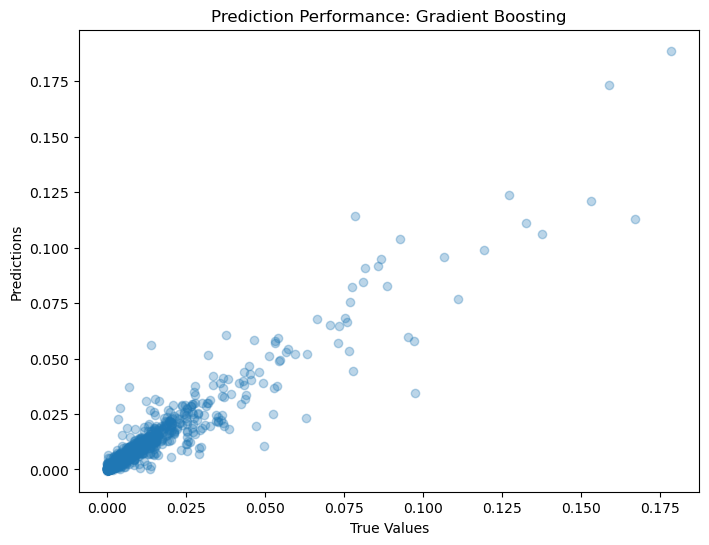

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nGradient Boosting Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

pyplot.figure(figsize=(8, 6))
pyplot.scatter(y_test_actual, y_pred, alpha=0.3)
pyplot.xlabel("True Values")
pyplot.ylabel("Predictions")
pyplot.title(f"Prediction Performance: {name}")
pyplot.show()

Model: Linear Regression
Mean Absolute Error (MAE): 0.0040
Root Mean Squared Error (RMSE): 0.0086
R^2 Score: 0.7219
----------------------------------------


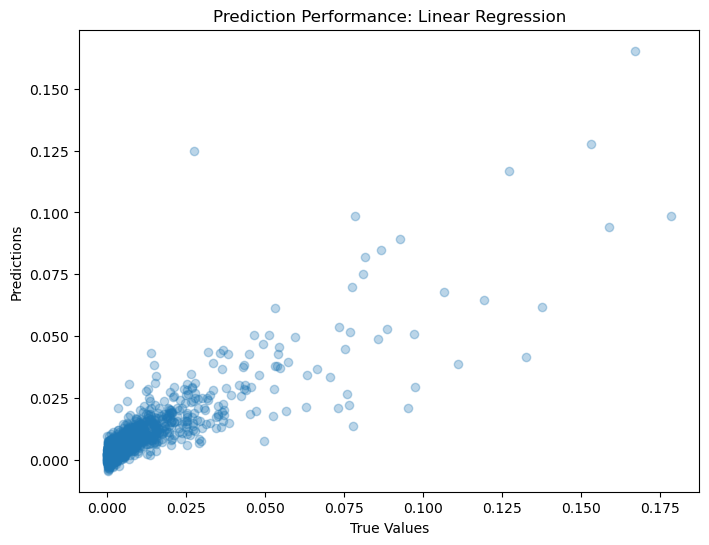

Model: Polynomial Regression
Mean Absolute Error (MAE): 0.0031
Root Mean Squared Error (RMSE): 0.0069
R^2 Score: 0.8231
----------------------------------------


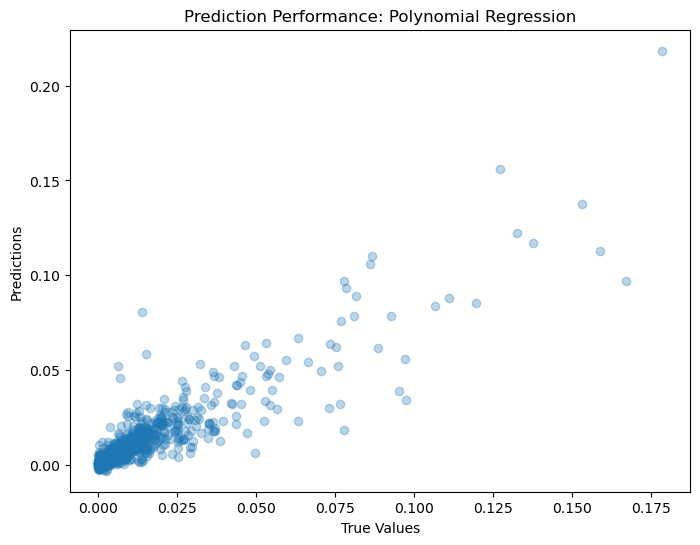

Model: Random Forest
Mean Absolute Error (MAE): 0.0023
Root Mean Squared Error (RMSE): 0.0060
R^2 Score: 0.8663
----------------------------------------


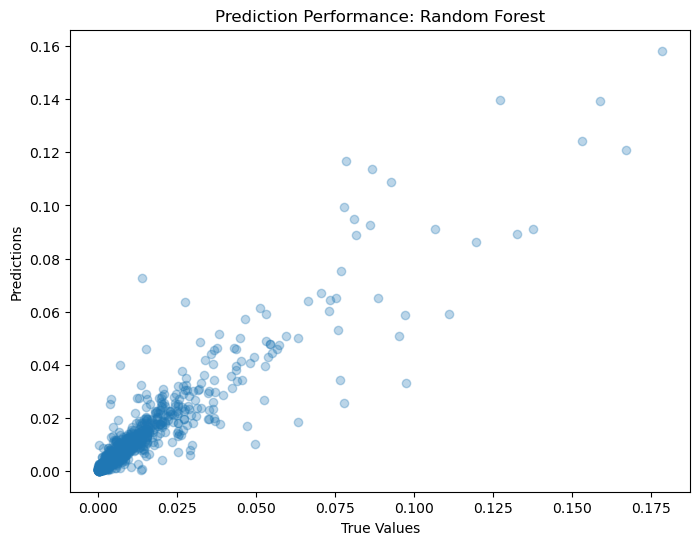

Model: XGBoost
Mean Absolute Error (MAE): 0.0022
Root Mean Squared Error (RMSE): 0.0054
R^2 Score: 0.8921
----------------------------------------


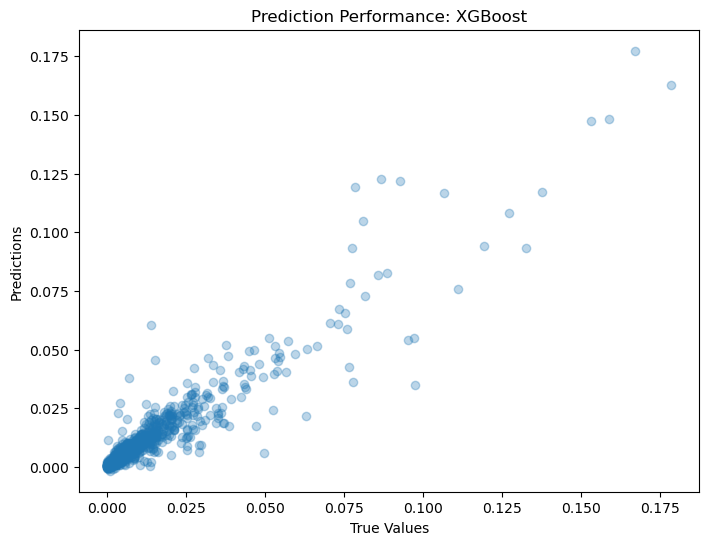

Model: Gradient Boosting
Mean Absolute Error (MAE): 0.0020
Root Mean Squared Error (RMSE): 0.0051
R^2 Score: 0.9037
----------------------------------------


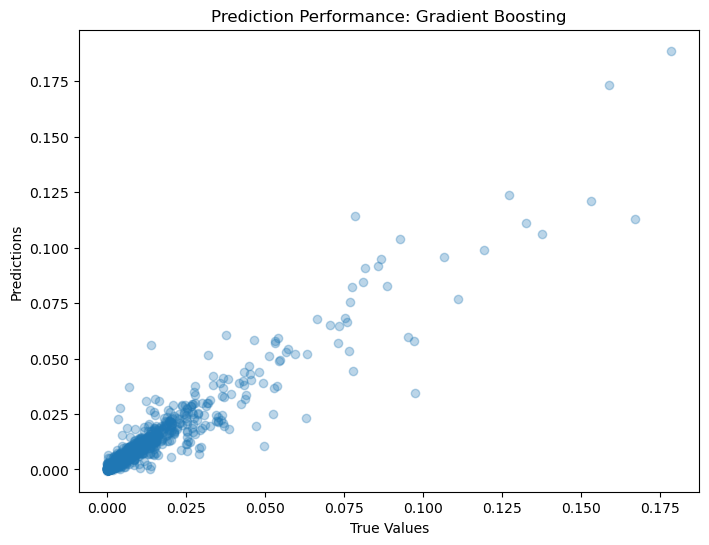

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

X = data_Frame_minmax[['Platform_Ordinal', 'Genre_Ordinal', 'Critic_Score', 'Rating_Ordinal',
                       'Publisher_Ordinal', 'Critic_Count', 'User_Score', 'Other_Sales']].values
y = data_Frame_minmax['Global_Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=185, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=370, learning_rate=0.05, max_depth=6, min_child_weight=5,
                             random_state=42, subsample=0.7, colsample_bytree=1.0, objective='reg:squarederror'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
}

for name, model in models.items():
    if name == "Polynomial Regression":
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
        y_test_actual = y_test
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_test_actual = y_test

    mae = mean_absolute_error(y_test_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
    r2 = r2_score(y_test_actual, y_pred)

    print(f"Model: {name}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 40)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_actual, y_pred, alpha=0.3)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(f"Prediction Performance: {name}")
    plt.show()
